In [15]:
library(DBI)
library(RSQLite)
library(dplyr)
library(ggplot2)

In [16]:
df <- read.csv("/Users/Guy/Documents/DataScience/data/numeric_feature_table.csv")

In [17]:
head(df)

,item_nbr,store_nbr,Year,month,store_cluster,prev_month_sales,prev_3month_sales,avg_prev_3months_sales,min_prev_3months_sales,max_prev_3months_sales,...,class1072,class1016,year2016,month7,month5,month6,month4,month8,top5_month,total_unit_sales
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1003679,1,2013,4,13,3.850148,3.988984,4.088774,3.806662,4.465908,...,0,0,0,0,0,0,1,0,1,3.806662
2,1003679,1,2013,5,13,3.806662,4.465908,3.821369,3.806662,3.850148,...,0,0,0,0,1,0,0,0,1,3.806662
3,1003679,1,2013,6,13,3.806662,3.850148,3.828641,3.806662,3.871201,...,0,0,0,0,0,1,0,0,1,3.871201
4,1003679,1,2013,7,13,3.871201,3.806662,3.713572,3.401197,3.871201,...,0,0,0,1,0,0,0,0,1,3.401197
5,1003679,1,2013,8,13,3.401197,3.806662,3.663562,3.401197,3.871201,...,0,0,0,0,0,0,0,1,1,3.663562
6,1003679,1,2013,9,13,3.663562,3.871201,3.680511,3.401197,3.912023,...,0,0,0,0,0,0,0,0,0,3.912023


In [18]:
dim(df)

[1] 1737726      99

In [19]:
df<- df[,!names(df) %in% c('month7','month5','month6','month4','month8')]

In [20]:
minmax <- function(x) {
    return(((x-min(x,na.rm=T))/(max(x,na.rm=T)-min(x,na.rm=T))))
}

In [29]:
nf<- c()
for (v in names(df)){
    if ((!v %in% c('Year','month','store_nbr','item_nbr'))&(is.numeric(df[[v]])==T)&
        (max(df[[v]],na.rm=T)>1 & length(unique(df[[v]]))>3))  {
        nf<- c(nf,v)
    } 
}

In [31]:
nf
length(nf)

[1] "store_cluster"                 "prev_month_sales"             
 [3] "prev_3month_sales"             "avg_prev_3months_sales"       
 [5] "min_prev_3months_sales"        "max_prev_3months_sales"       
 [7] "monthly_oilprice_avg"          "total_month_holidays"         
 [9] "total_month_transactions"      "prev_month_transactions"      
[11] "prev_3month_transactions"      "avg_prev_3months_transactions"
[13] "min_prev_3months_transactions" "max_prev_3months_transactions"
[15] "total_city_sales.x"            "sales_perc.x"                 
[17] "id"                            "total_unit_sales"

[1] 18

In [32]:
nf<-nf[2:18]
nf

[1] "prev_month_sales"              "prev_3month_sales"            
 [3] "avg_prev_3months_sales"        "min_prev_3months_sales"       
 [5] "max_prev_3months_sales"        "monthly_oilprice_avg"         
 [7] "total_month_holidays"          "total_month_transactions"     
 [9] "prev_month_transactions"       "prev_3month_transactions"     
[11] "avg_prev_3months_transactions" "min_prev_3months_transactions"
[13] "max_prev_3months_transactions" "total_city_sales.x"           
[15] "sales_perc.x"                  "id"                           
[17] "total_unit_sales"

In [33]:
nf <- nf[1:15]

In [34]:
nf

[1] "prev_month_sales"              "prev_3month_sales"            
 [3] "avg_prev_3months_sales"        "min_prev_3months_sales"       
 [5] "max_prev_3months_sales"        "monthly_oilprice_avg"         
 [7] "total_month_holidays"          "total_month_transactions"     
 [9] "prev_month_transactions"       "prev_3month_transactions"     
[11] "avg_prev_3months_transactions" "min_prev_3months_transactions"
[13] "max_prev_3months_transactions" "total_city_sales.x"           
[15] "sales_perc.x"

In [36]:
df$sales_perc.x <- (df$sales_perc.x)/100

In [37]:
df$sales_perc.x

[1] 0.504859385 0.487144528 0.494210481 0.480950700 0.468695562 0.497405727
    [7] 0.495427883 0.507966969 0.485479062 0.493120463 0.492727140 0.513177279
   [13] 0.506752185 0.502151864 0.484502287 0.493798923 0.503664110 0.495542595
   [19] 0.492772882 0.469315995 0.490650956 0.478645727 0.496496343 0.497481815
   [25] 0.492045962 0.482579067 0.470743159 0.463544642 0.477284624 0.471845809
   [31] 0.486088535 0.459679799 0.480343187 0.471952404 0.476405459 0.499352666
   [37] 0.474025153 0.473526854 0.466030842 0.456806726 0.477852039 0.483059009
   [43] 0.484743088 0.470371508 0.487246550 0.478711722 0.483734770 0.473400594
   [49] 0.452586916 0.466543727 0.454475812 0.435216708 0.504859385 0.487144528
   [55] 0.494210481 0.480950700 0.468695562 0.497405727 0.495427883 0.507966969
   [61] 0.485479062 0.493120463 0.492727140 0.513177279 0.506752185 0.502151864
   [67] 0.484502287 0.493798923 0.503664110 0.495542595 0.492772882 0.469315995
   [73] 0.490650956 0.478645727 0.496496343 0.497481815 0.492045962 0.482579067
   [79] 0.470743159 0.463544642 0.477284624 0.471845809 0.486088535 0.459679799
   [85] 0.480343187 0.471952404 0.476405459 0.499352666 0.474025153 0.473526854
   [91] 0.466030842 0.456806726 0.477852039 0.483059009 0.484743088 0.470371508
   [97] 0.487246550 0.478711722 0.483734770 0.473400594 0.452586916 0.466543727
  [103] 0.454475812 0.435216708 0.033015991 0.033311372 0.033285169 0.035764391
  [109] 0.036035049 0.034917189 0.035525334 0.034846708 0.035432809 0.032635148
  [115] 0.032991968 0.035172297 0.034806336 0.034250943 0.033971762 0.034822359
  [121] 0.031770107 0.031948444 0.032076122 0.030868584 0.030167349 0.032529182
  [127] 0.030298271 0.031408570 0.030848901 0.030352630 0.030165092 0.030572142
  [133] 0.029106050 0.029402391 0.028751559 0.030659171 0.028821587 0.031823903
  [139] 0.030868422 0.028735026 0.029605147 0.027274279 0.029290498 0.031842645
  [145] 0.031575550 0.030724835 0.028656864 0.030078197 0.027801664 0.031429748
  [151] 0.029336370 0.029721253 0.028495408 0.029822949 0.028752395 0.031293012
  [157] 0.030532988 0.029636350 0.029147785 0.028789499 0.027441781 0.027752364
  [163] 0.029091193 0.028124616 0.026167561 0.026957140 0.027293996 0.027620191
  [169] 0.027558403 0.026467870 0.027521138 0.025820872 0.027225157 0.028428591
  [175] 0.028954078 0.028358620 0.027933409 0.027900807 0.027680518 0.022767855
  [181] 0.029310001 0.027075244 0.029772243 0.026671858 0.025898689 0.025517703
  [187] 0.025226223 0.026931915 0.026154060 0.026299264 0.024945091 0.026055744
  [193] 0.024097434 0.023538341 0.023820075 0.025577805 0.025177085 0.023949633
  [199] 0.022771490 0.022724130 0.023480124 0.023338126 0.024628361 0.024452313
  [205] 0.023263830 0.023518934 0.024244170 0.030532988 0.029636350 0.029147785
  [211] 0.028789499 0.027441781 0.027752364 0.029091193 0.028124616 0.026167561
  [217] 0.026957140 0.027293996 0.027620191 0.027558403 0.026467870 0.027521138
  [223] 0.025820872 0.027225157 0.028428591 0.028954078 0.028358620 0.027933409
  [229] 0.027900807 0.027680518 0.021841086 0.022767855 0.029310001 0.027075244
  [235] 0.029772243 0.026671858 0.025898689 0.025517703 0.025226223 0.026931915
  [241] 0.026154060 0.026299264 0.024945091 0.026055744 0.024097434 0.023538341
  [247] 0.023820075 0.025577805 0.025177085 0.023949633 0.022771490 0.022724130
  [253] 0.023480124 0.023338126 0.024628361 0.024452313 0.023263830 0.023518934
  [259] 0.024244170 0.015156889 0.014729959 0.014854327 0.015760517 0.014683739
  [265] 0.014956220 0.015583265 0.015332405 0.014017794 0.015002330 0.014886258
  [271] 0.014634520 0.014763503 0.013833626 0.014487984 0.001467592 0.010784159
  [277] 0.014034149 0.013915310 0.013336264 0.014148831 0.013574306 0.012943260
  [283] 0.013572883 0.013357945 0.013664414 0.013471219 0.012388917 0.012758272
  [289] 0.012846720 0.012114906 0.011965226 0.012338082 0.012702674 0.012410973
  [295] 0.012211633 0.012250806 0.012843554 0.012270701 0.012485050 0.013570729
  [3

In [38]:
nf <- nf[1:14]

In [39]:
for (v in nf){
    df[[v]] <- minmax(df[[v]])
}


In [76]:
##df$total_unit_sales <- minmax(df$total_unit_sales)

In [41]:
head(df[nf])

,prev_month_sales,prev_3month_sales,avg_prev_3months_sales,min_prev_3months_sales,max_prev_3months_sales,monthly_oilprice_avg,total_month_holidays,total_month_transactions,prev_month_transactions,prev_3month_transactions,avg_prev_3months_transactions,min_prev_3months_transactions,max_prev_3months_transactions,total_city_sales.x
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3351330,0.3573296,0.3702218,0.3747752,0.4005978,0.8091618,0.6666667,0.4139400,0.3884088,0.4069605,0.3319220,0.3756576,0.3171891,0.7357655
2,0.3275585,0.4404394,0.3224455,0.3747752,0.2881880,0.8417938,0.3333333,0.4095254,0.4020172,0.3422618,0.3527235,0.4242640,0.3171891,0.7463019
3,0.3275585,0.3331357,0.3237449,0.3747752,0.2920314,0.8583572,0.5000000,0.3958149,0.3977297,0.3865471,0.3511795,0.4199006,0.3171891,0.7587423
4,0.3388002,0.3255579,0.3031859,0.3072443,0.2920314,0.9750580,0.5000000,0.4249667,0.3844142,0.4000902,0.3553186,0.4199006,0.3284877,0.7079158
5,0.2569325,0.3255579,0.2942507,0.3072443,0.2920314,1.0000000,0.5000000,0.4046927,0.4127263,0.3958233,0.3535046,0.4199006,0.3284877,0.7204228
6,0.3026324,0.3368045,0.2972790,0.3072443,0.2994836,0.9962855,0.0000000,0.3925477,0.3930362,0.3825716,0.3522782,0.4164346,0.3284877,0.7681709


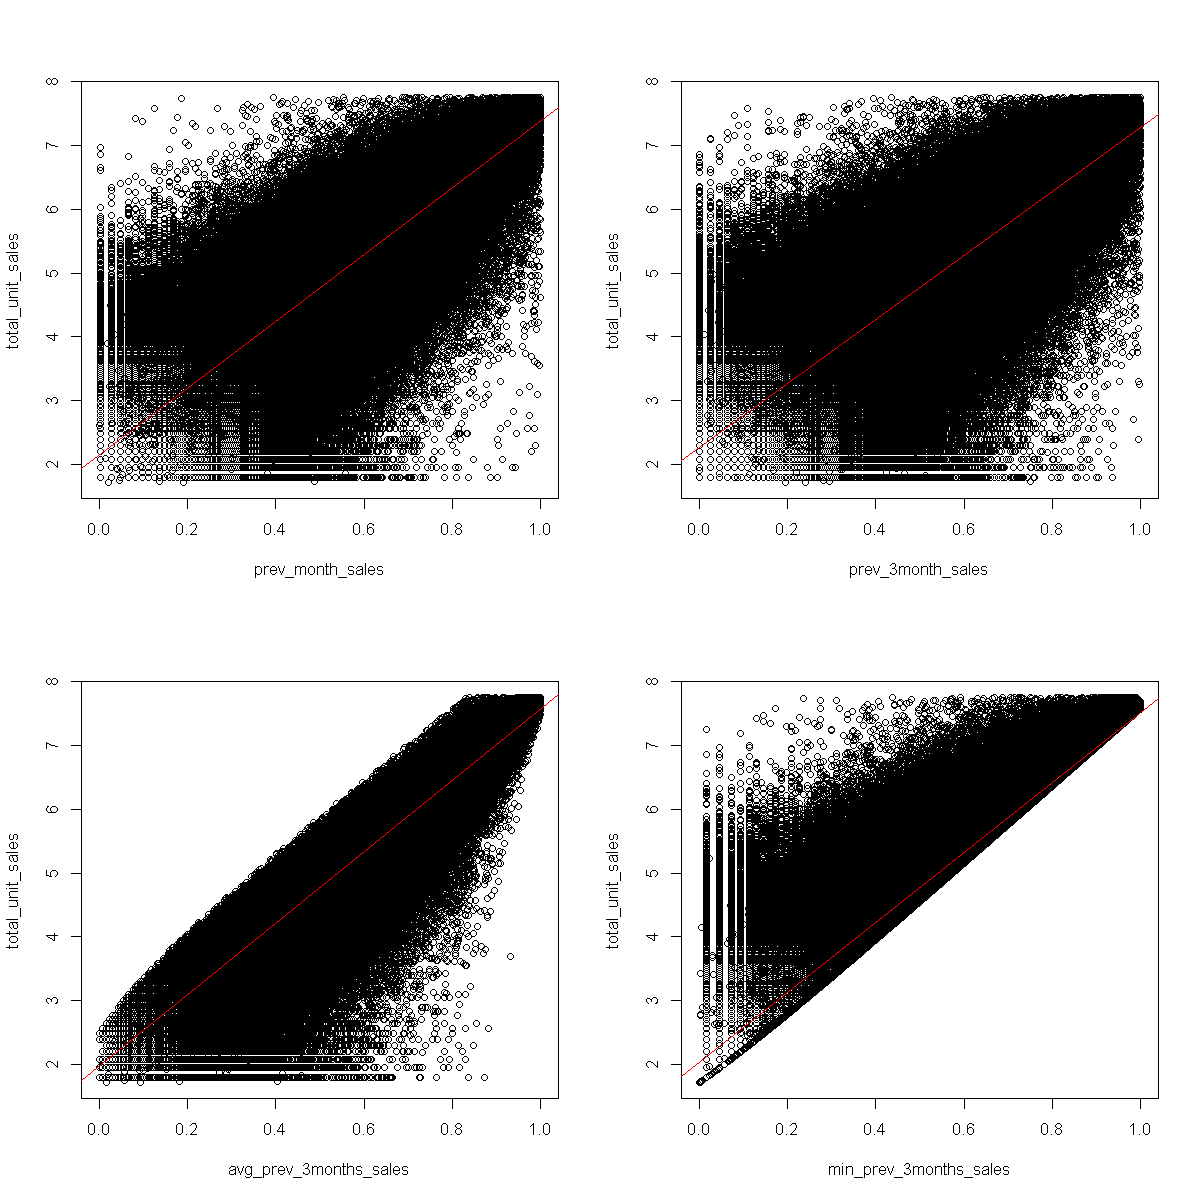

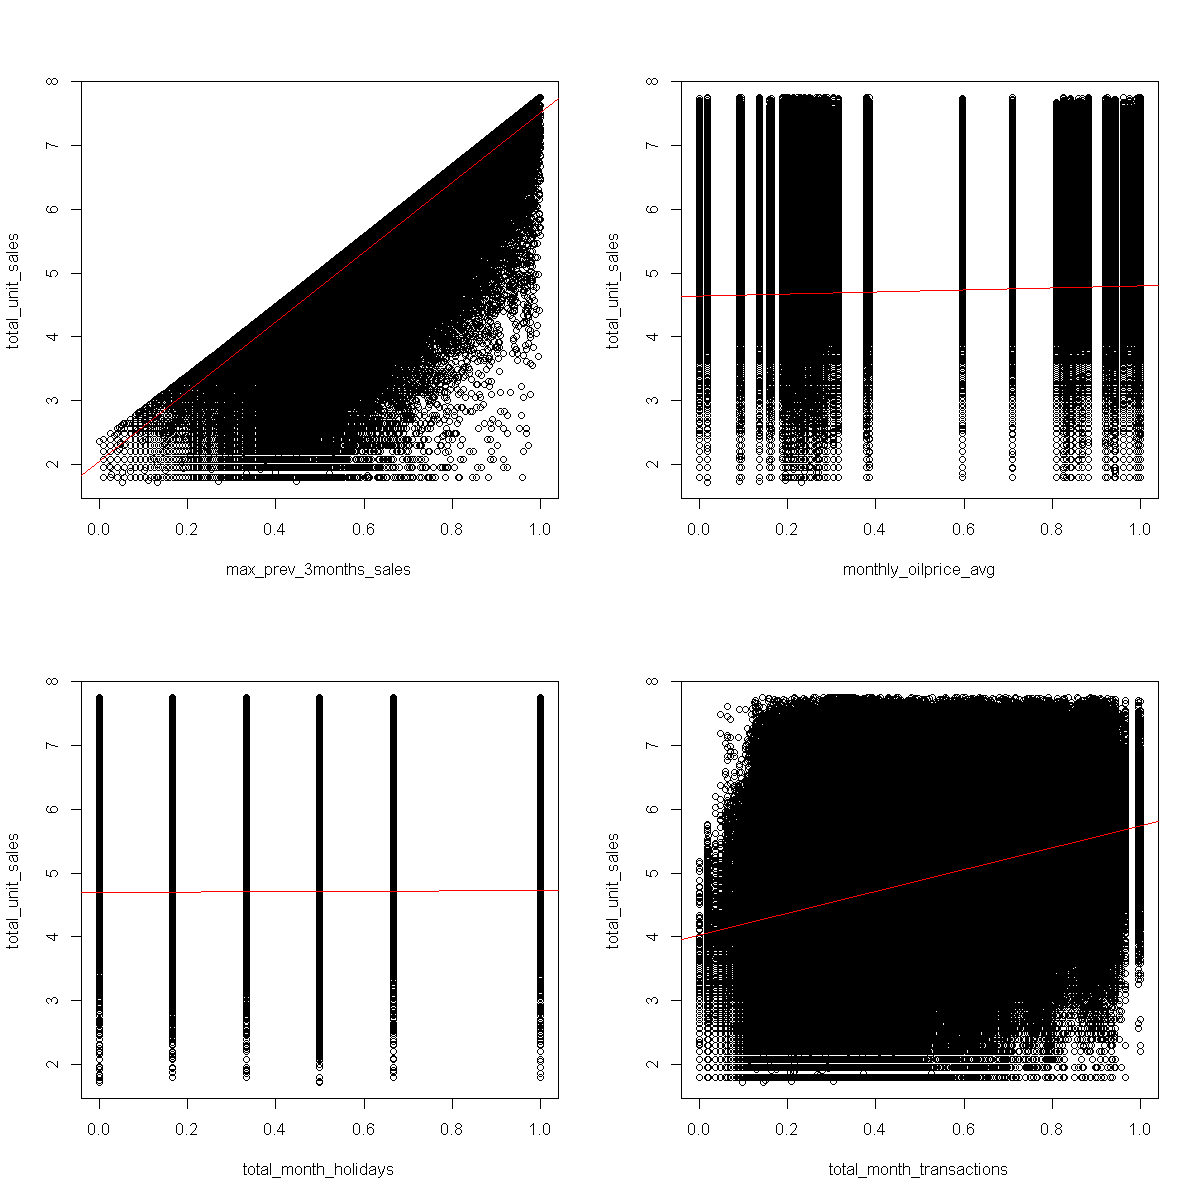

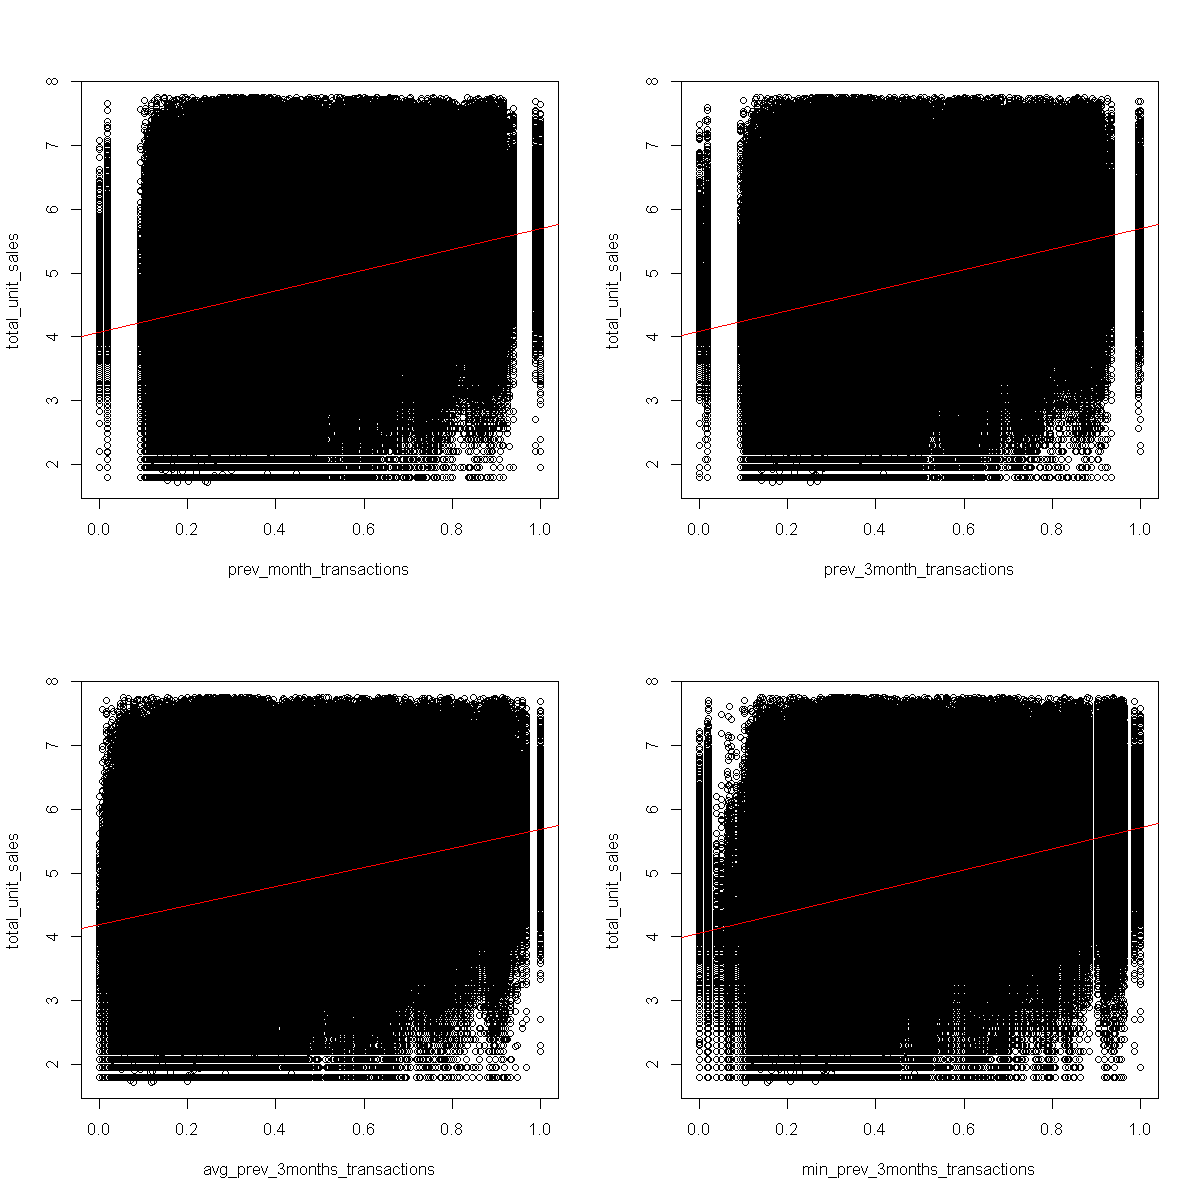

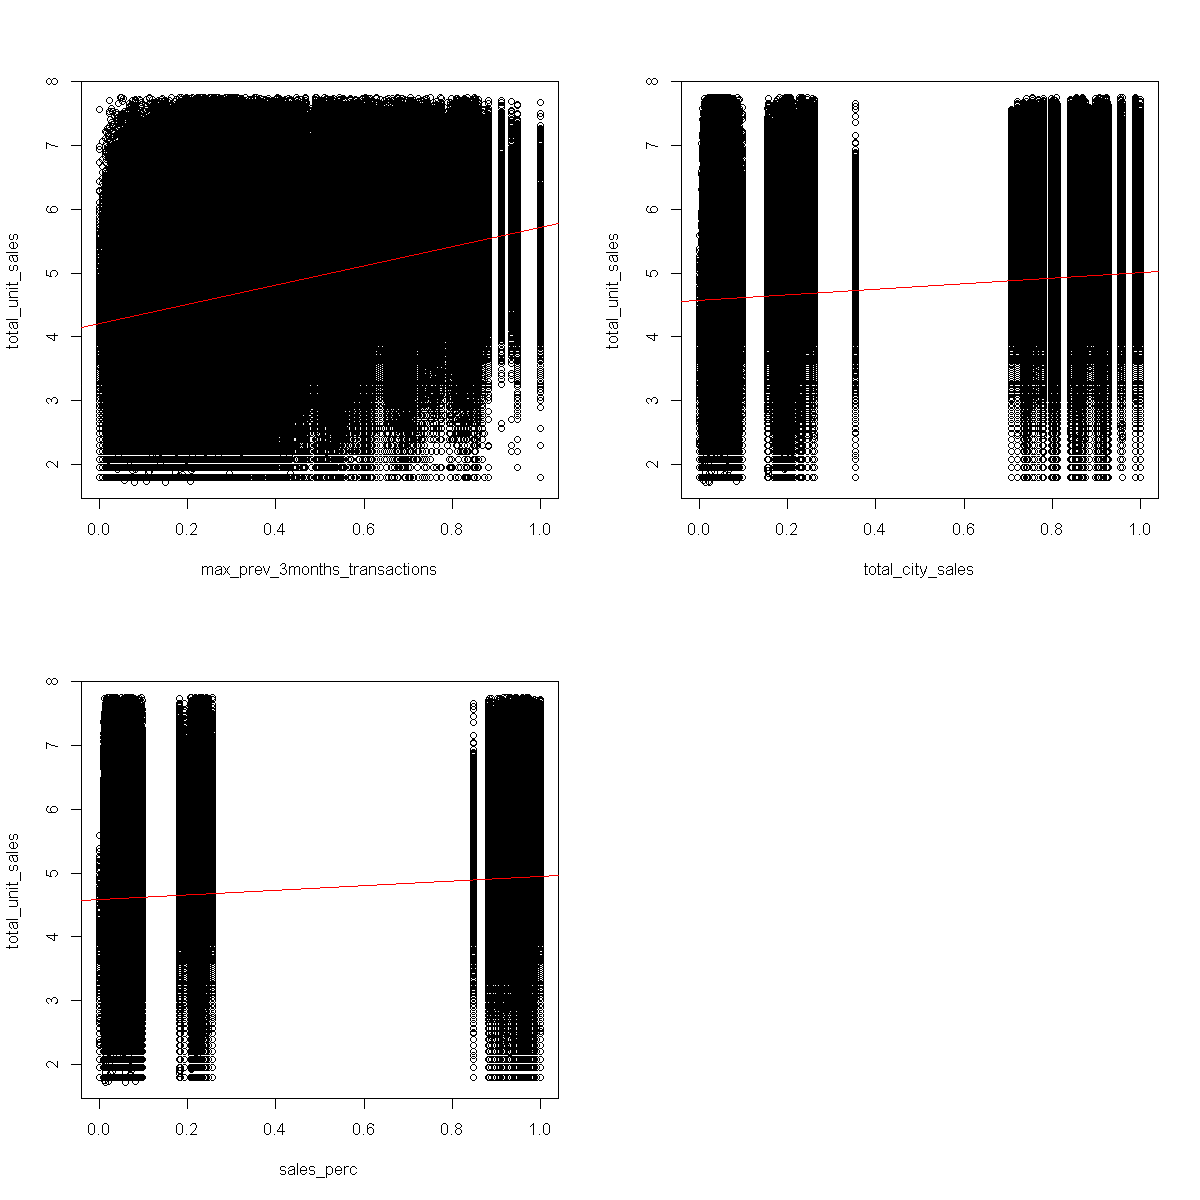

In [15]:
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(2,2))
for (v in nf){
            a<-max(df[[v]],na.rm=TRUE) 
            plot(df[[v]],df$total_unit_sales,xlab=v,ylab='total_unit_sales',xlim=c(0,a))
            abline(coef(lm(df$total_unit_sales~df[[v]])), col="red")
           }
         

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


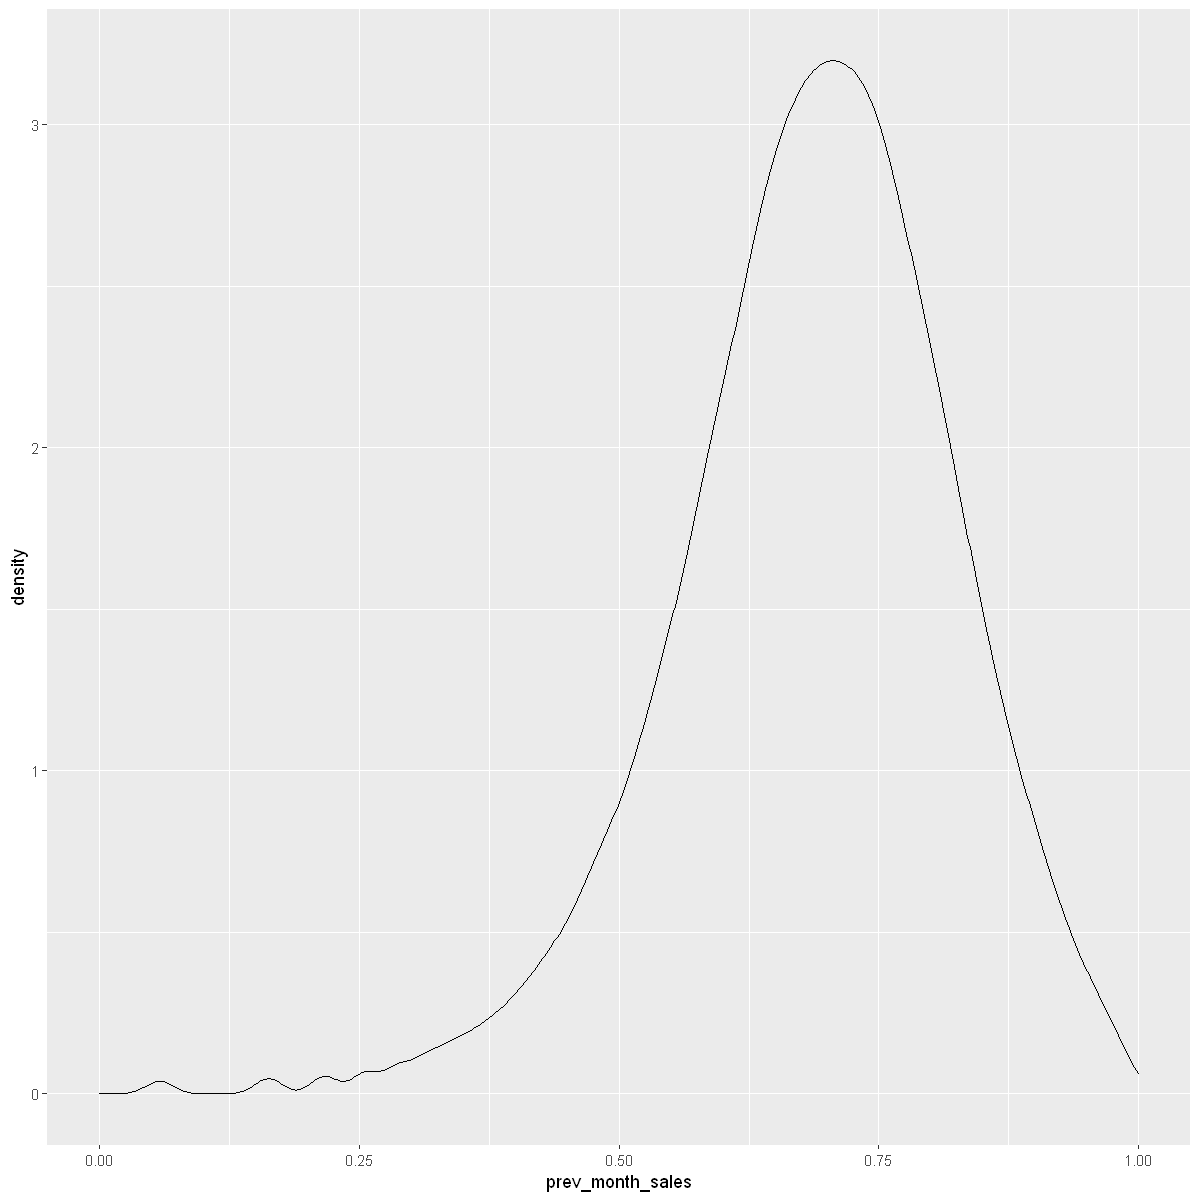

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


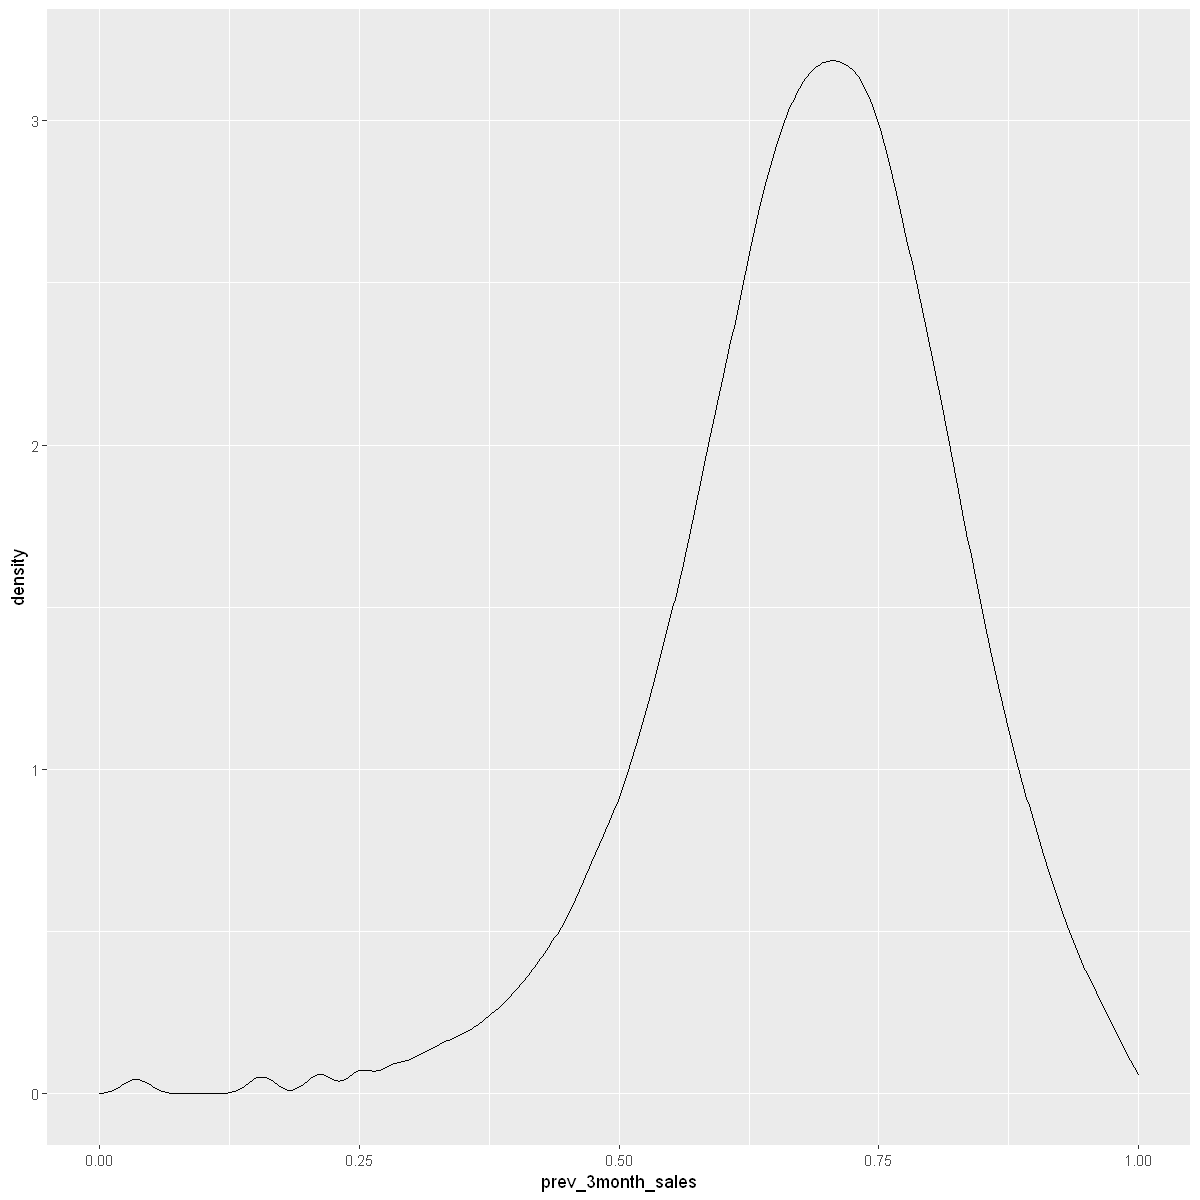

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


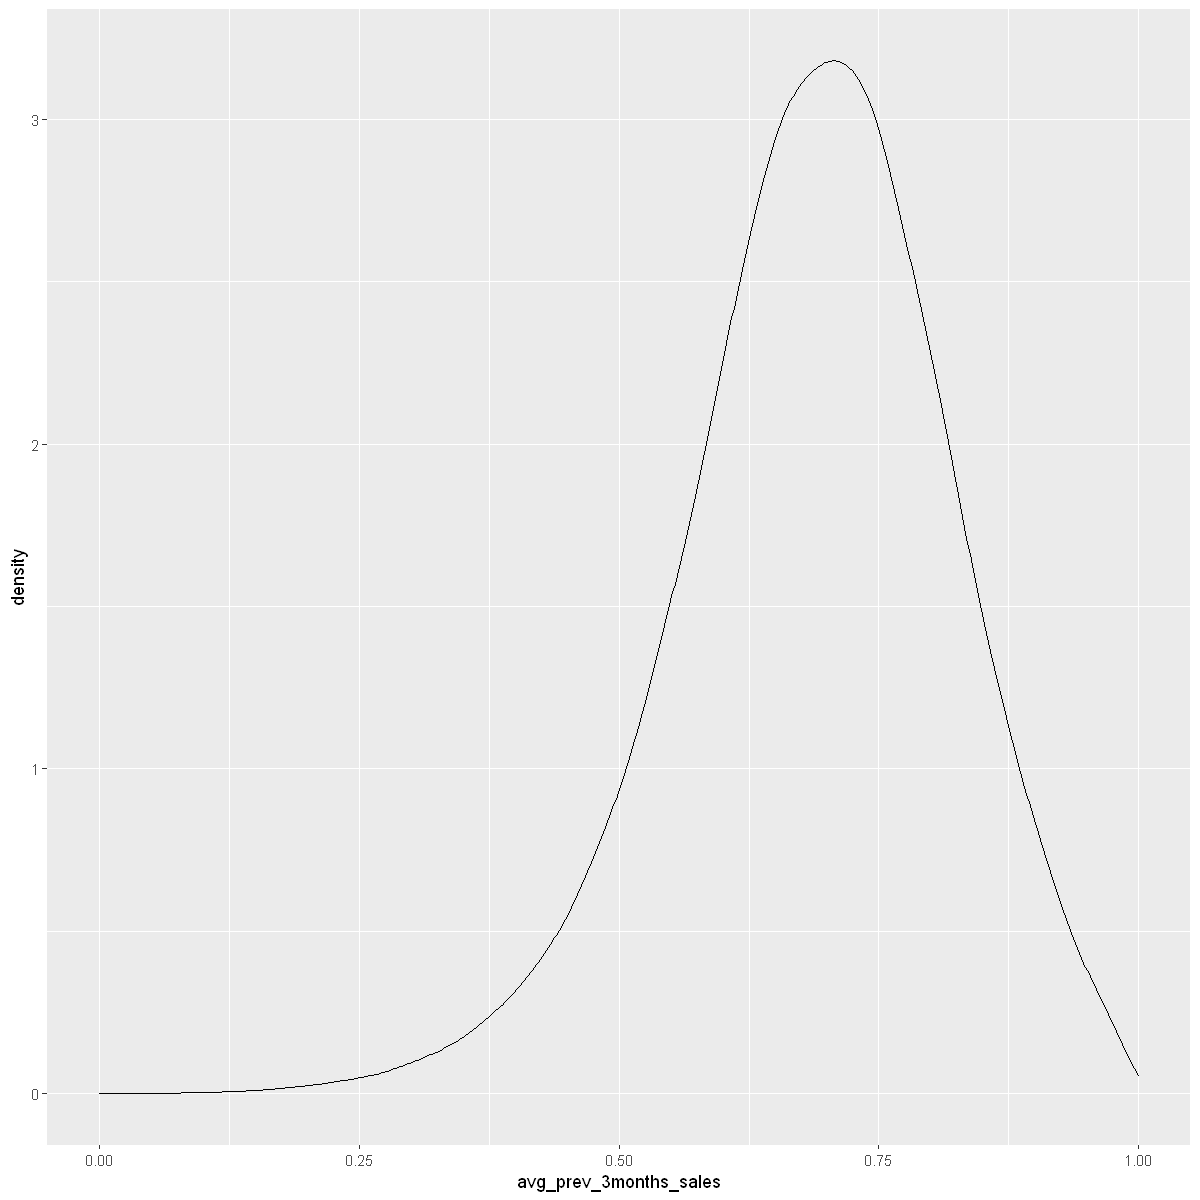

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


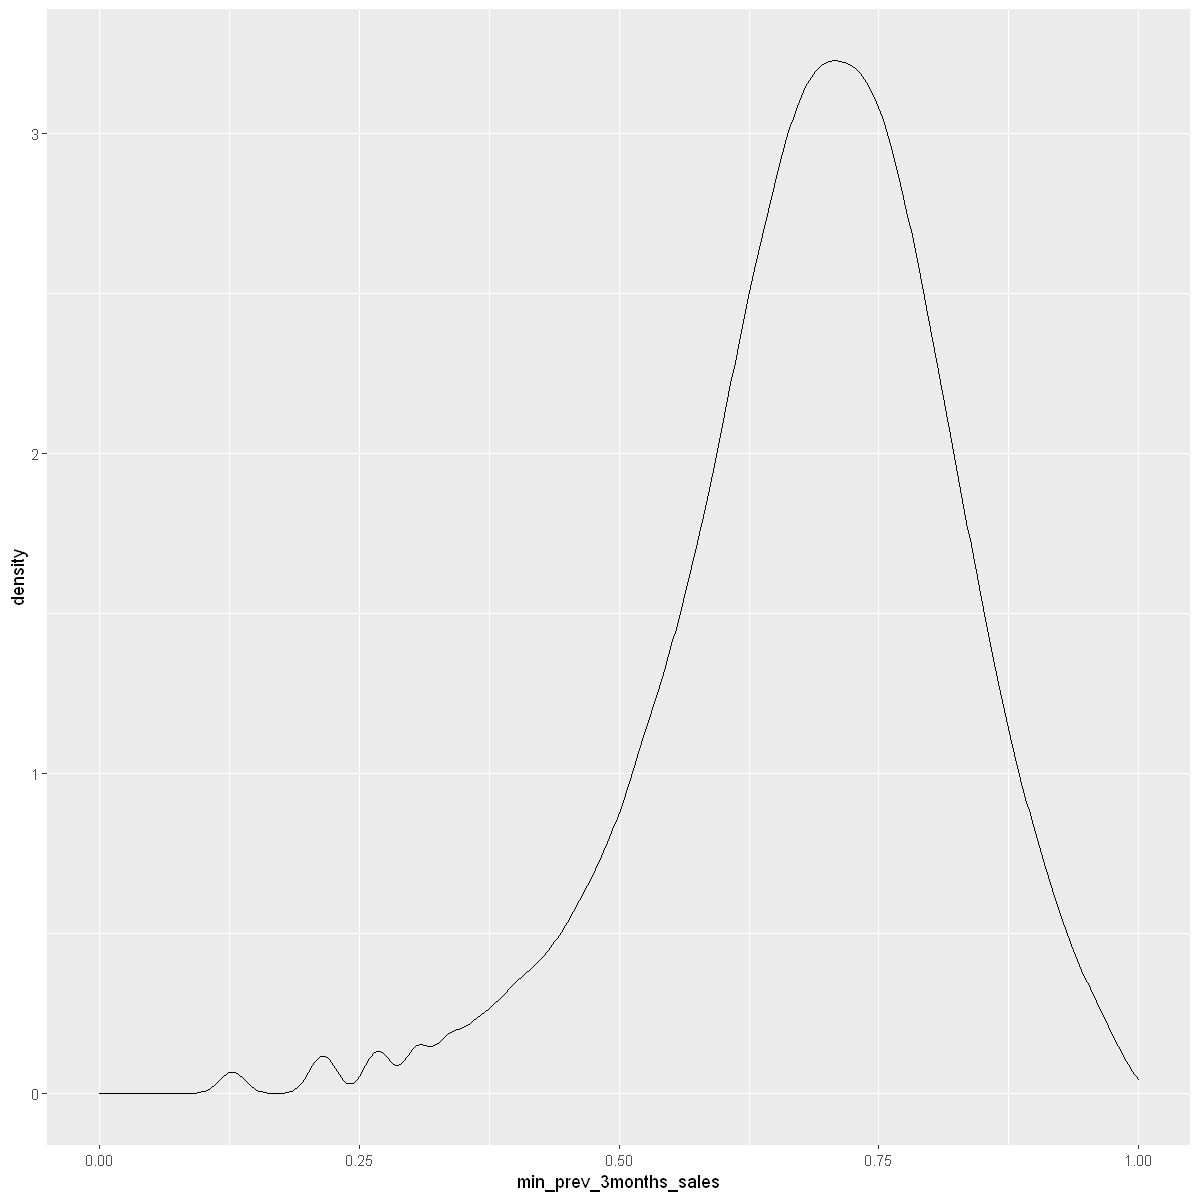

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


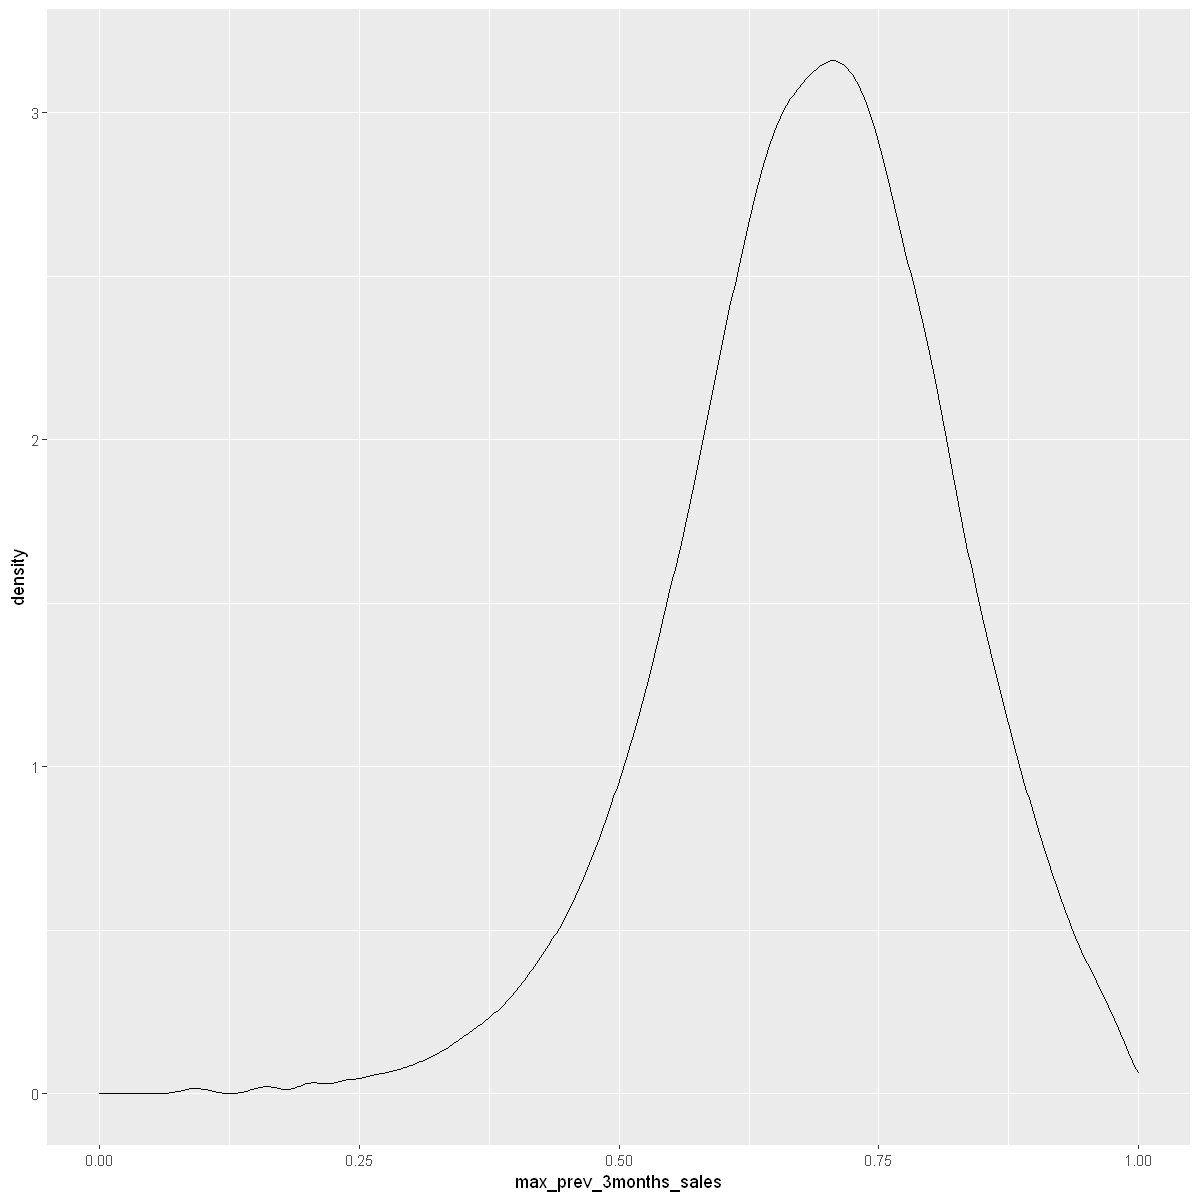

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


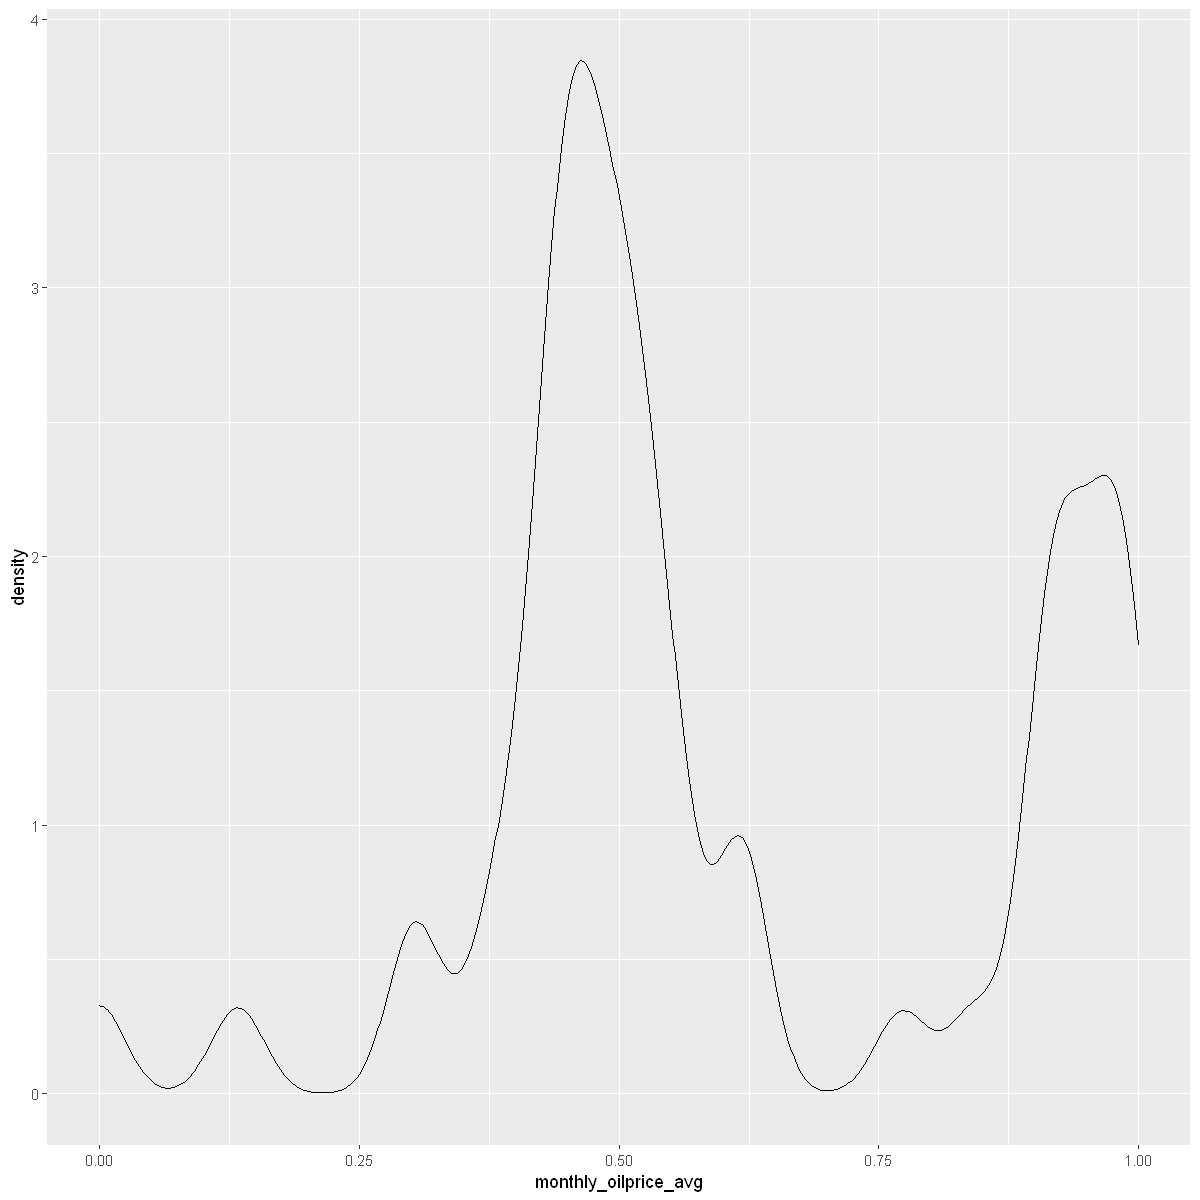

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


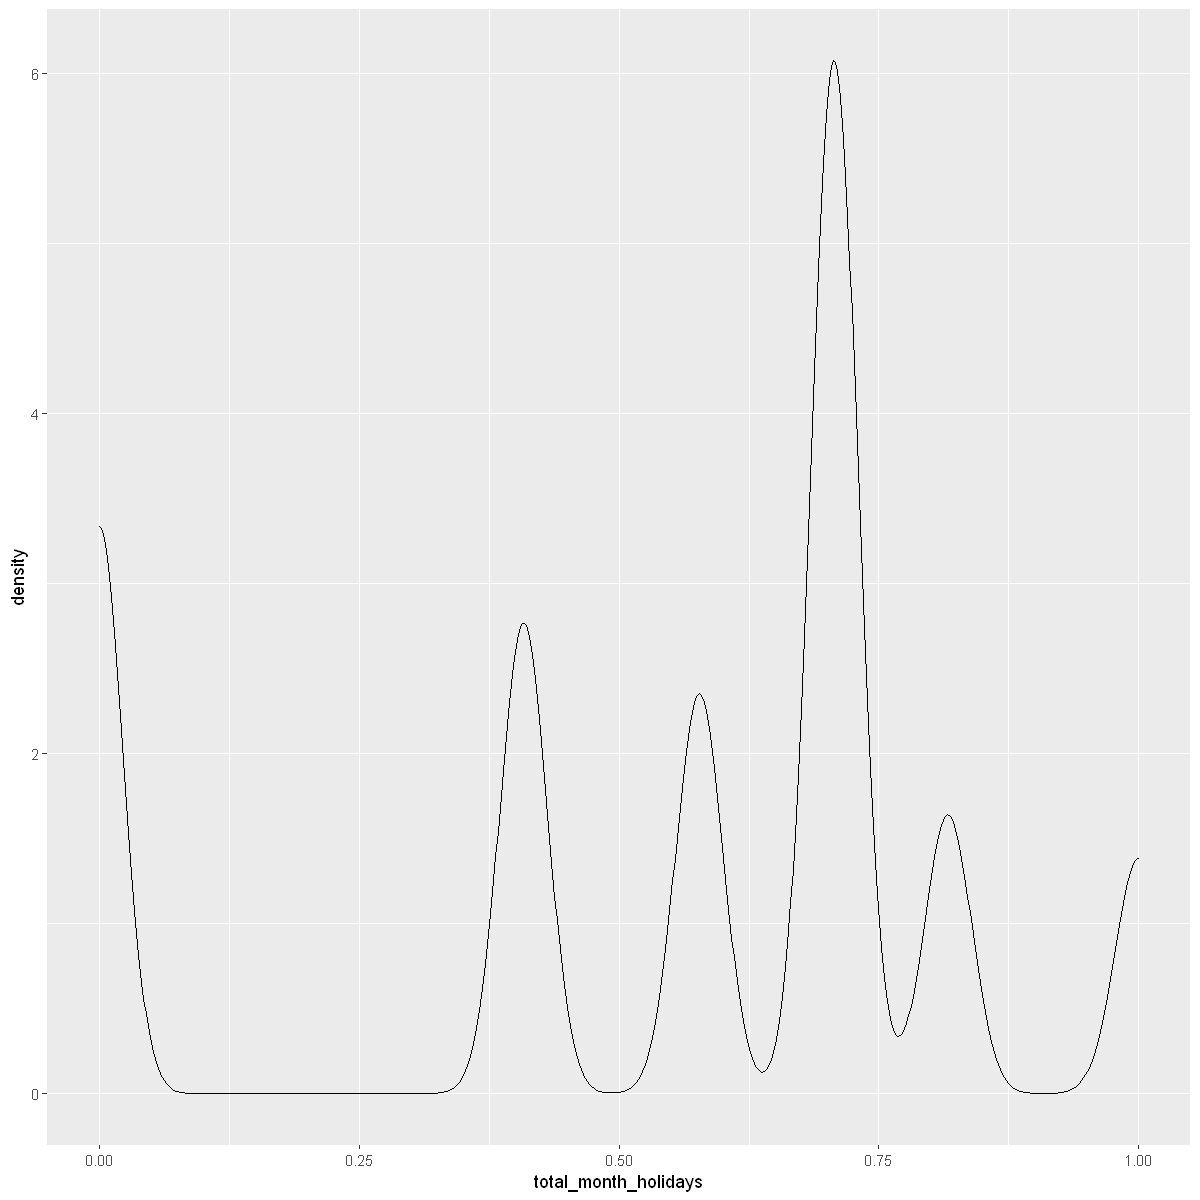

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


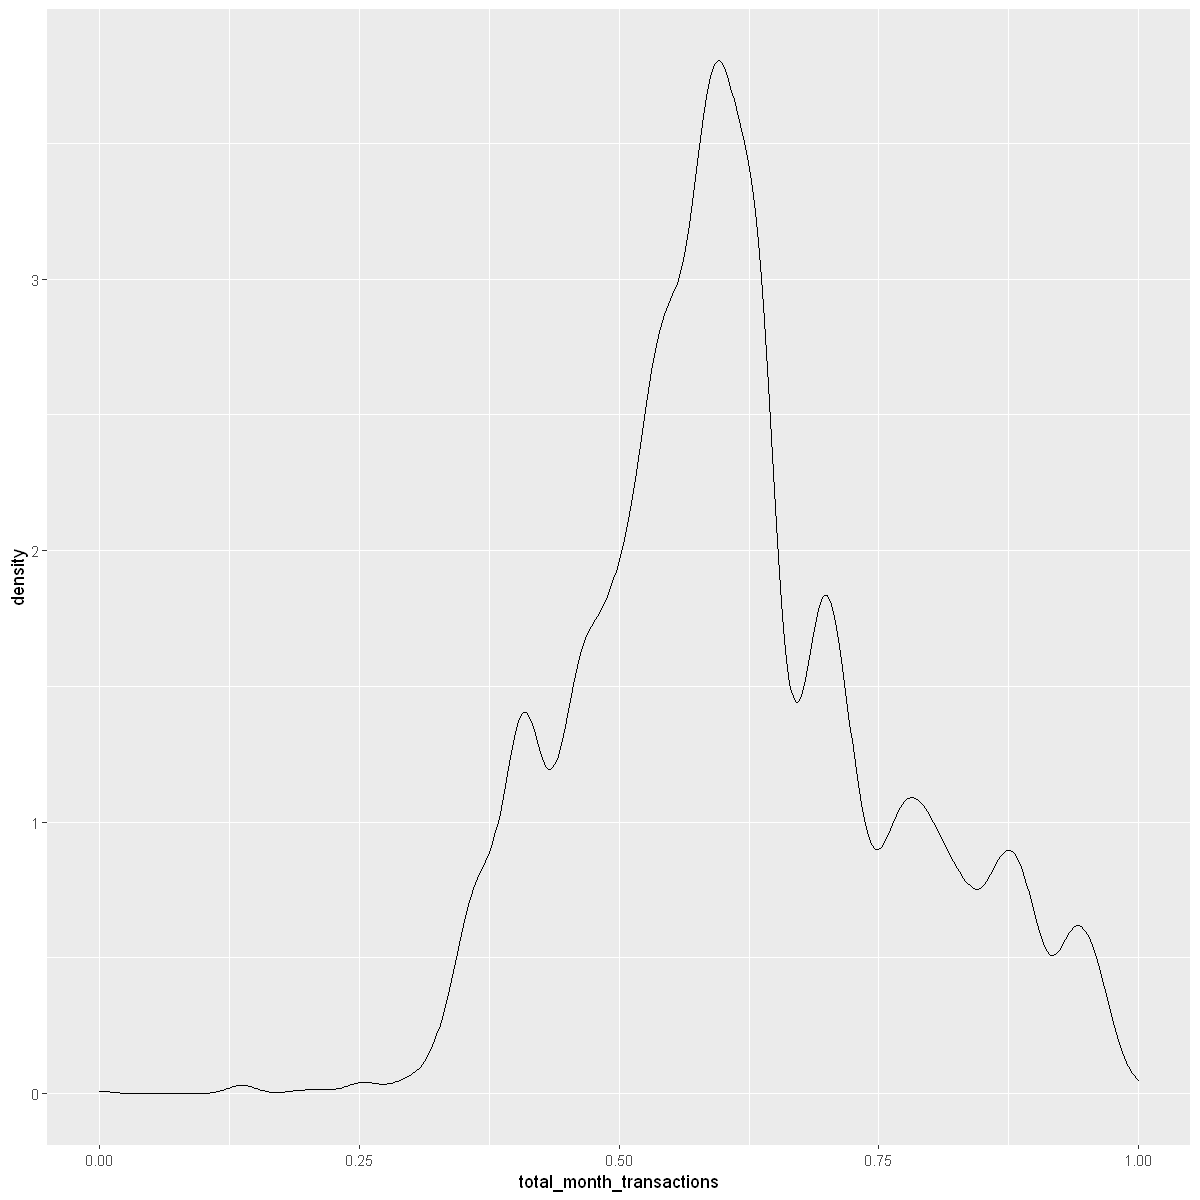

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


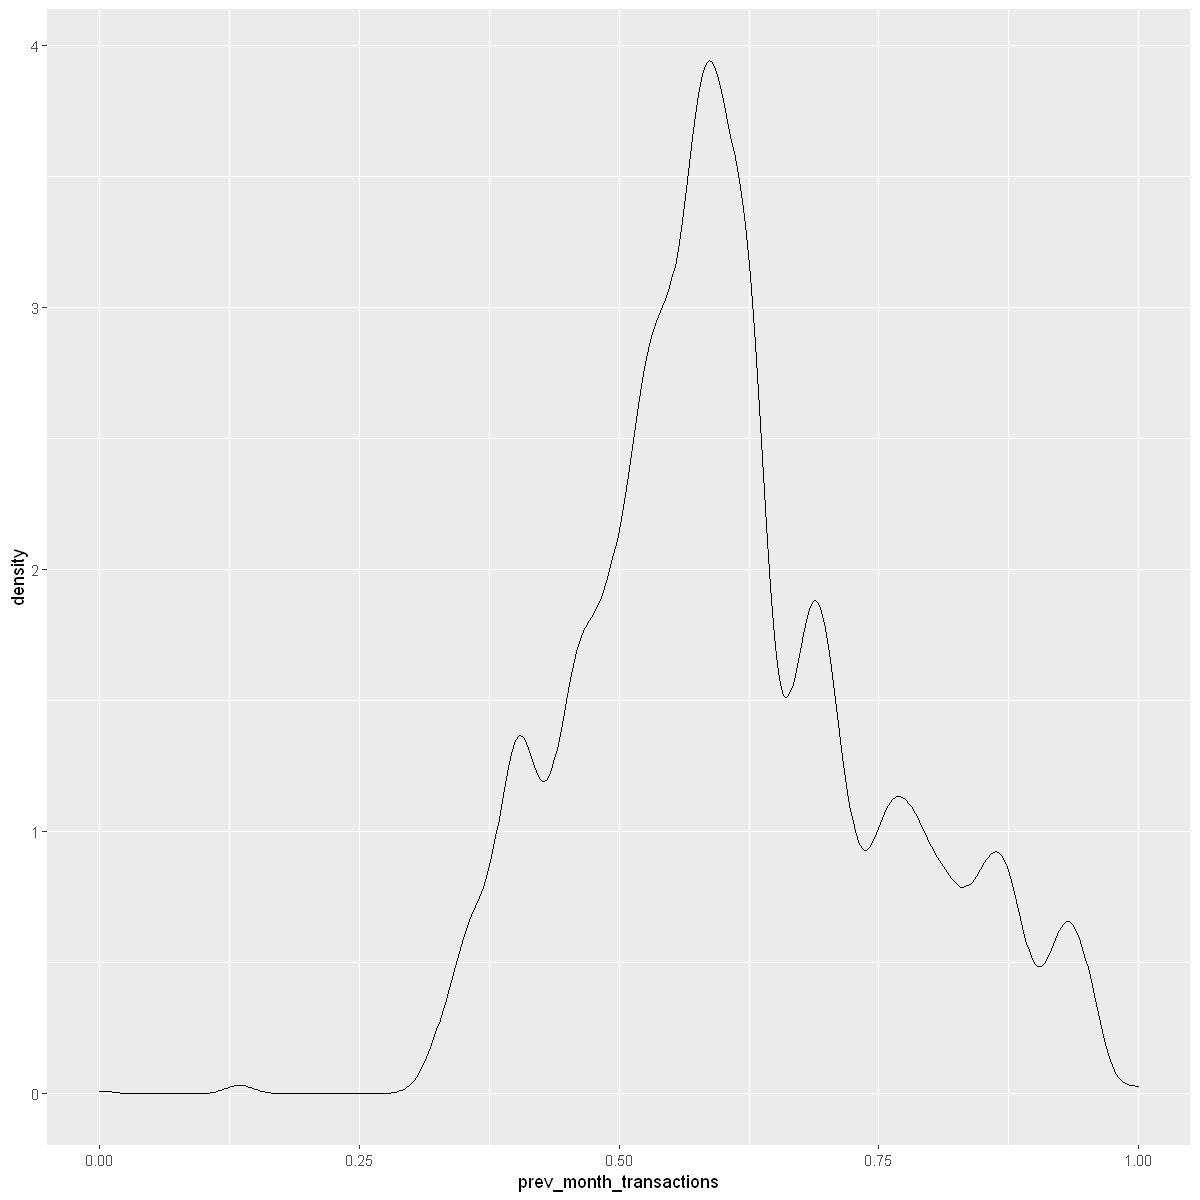

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


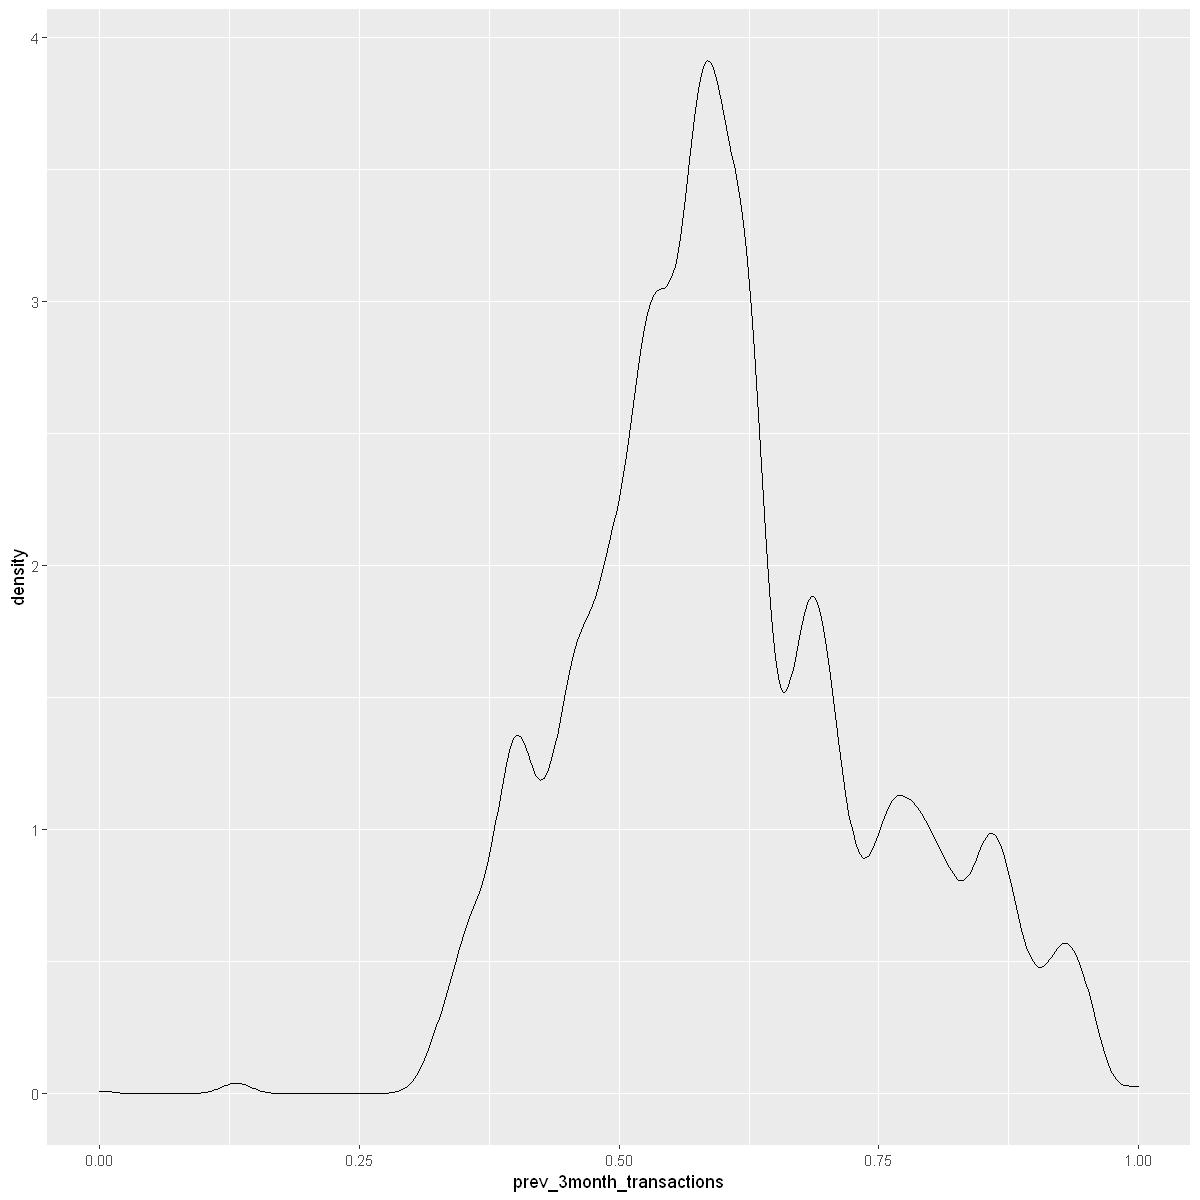

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


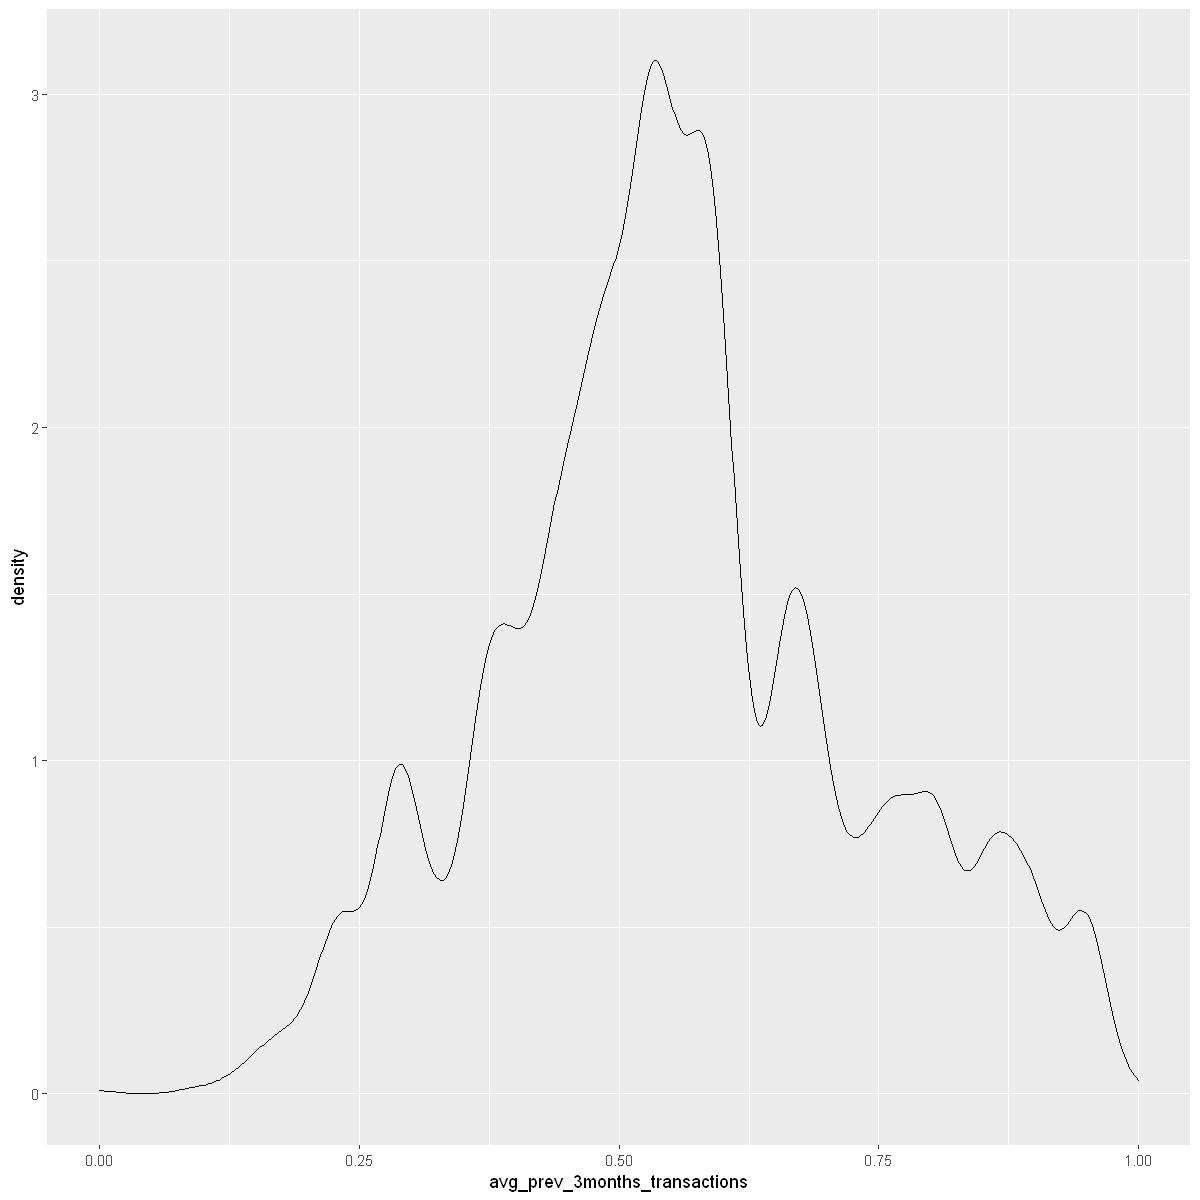

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


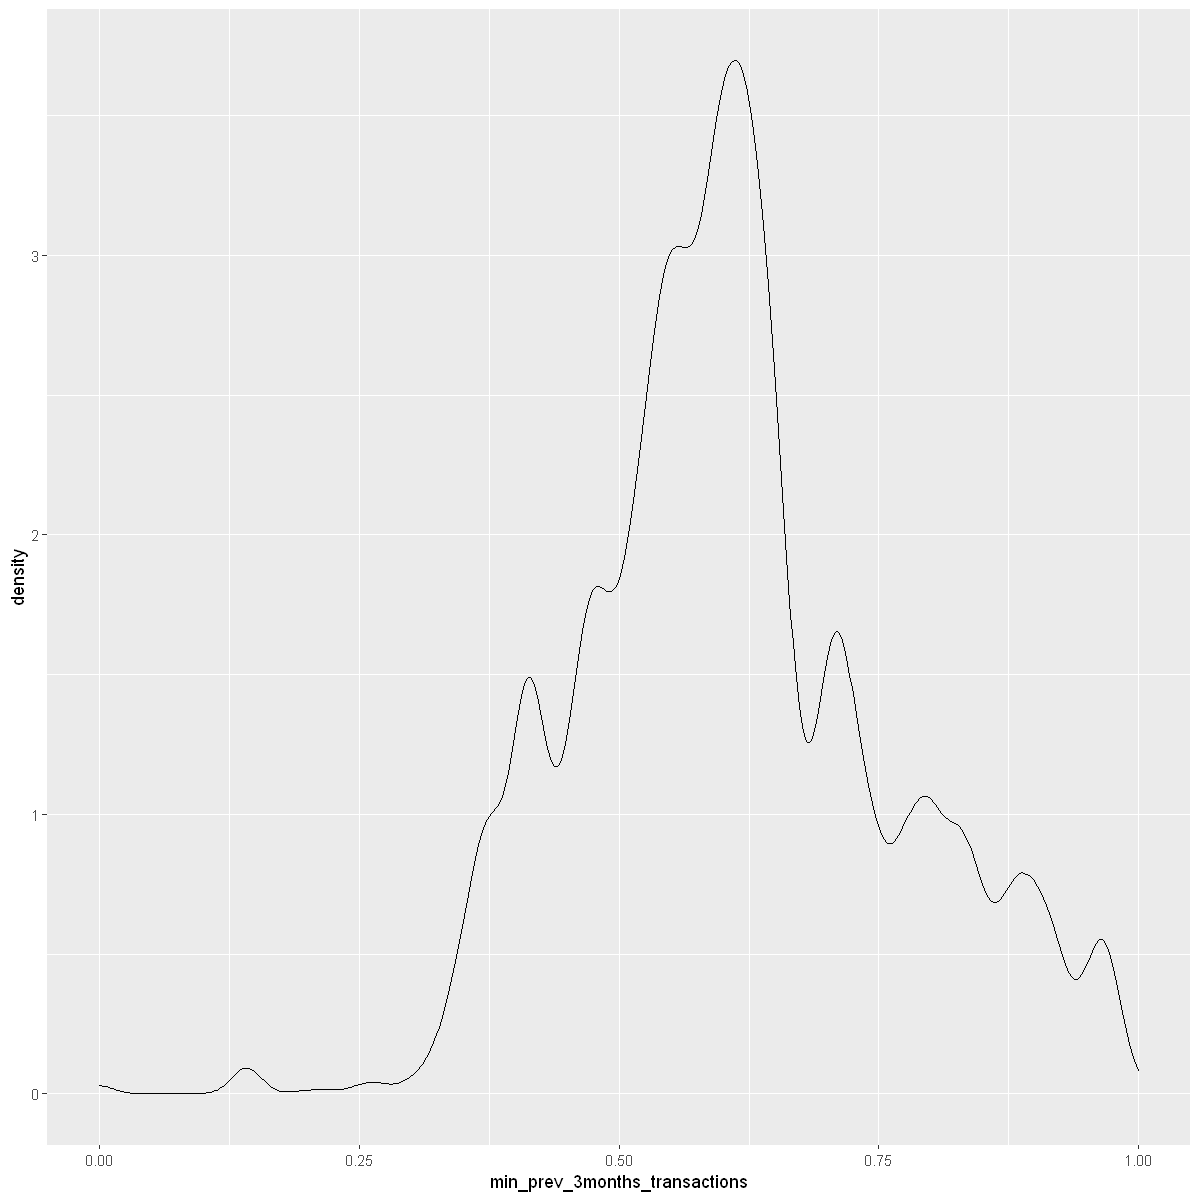

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


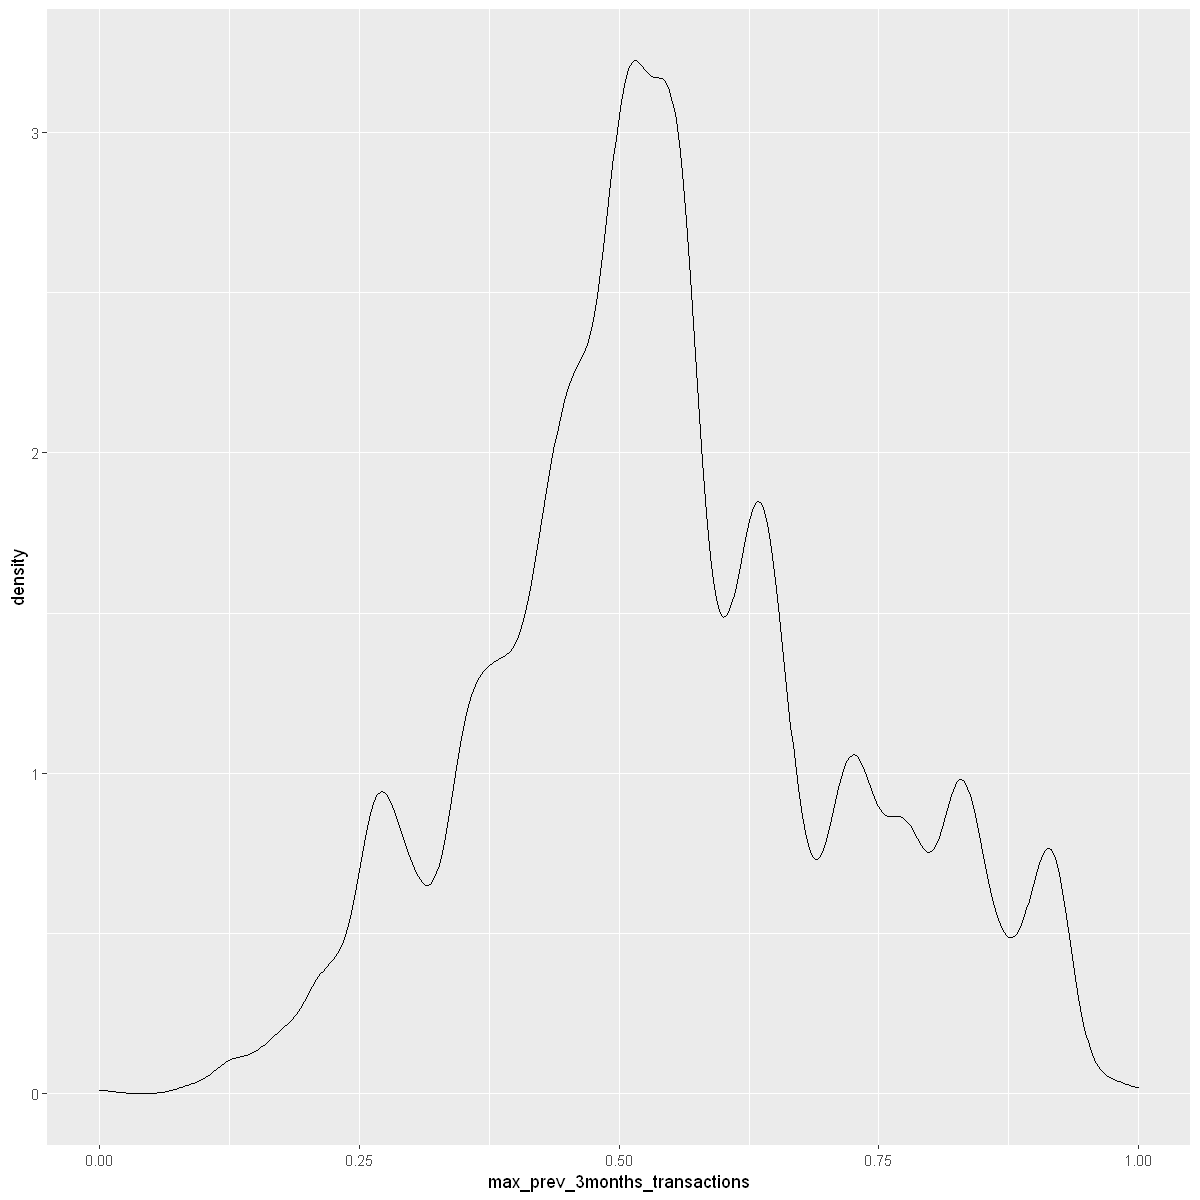

Warning message:
"Use of `df[[v]]` is discouraged. Use `.data[[v]]` instead."


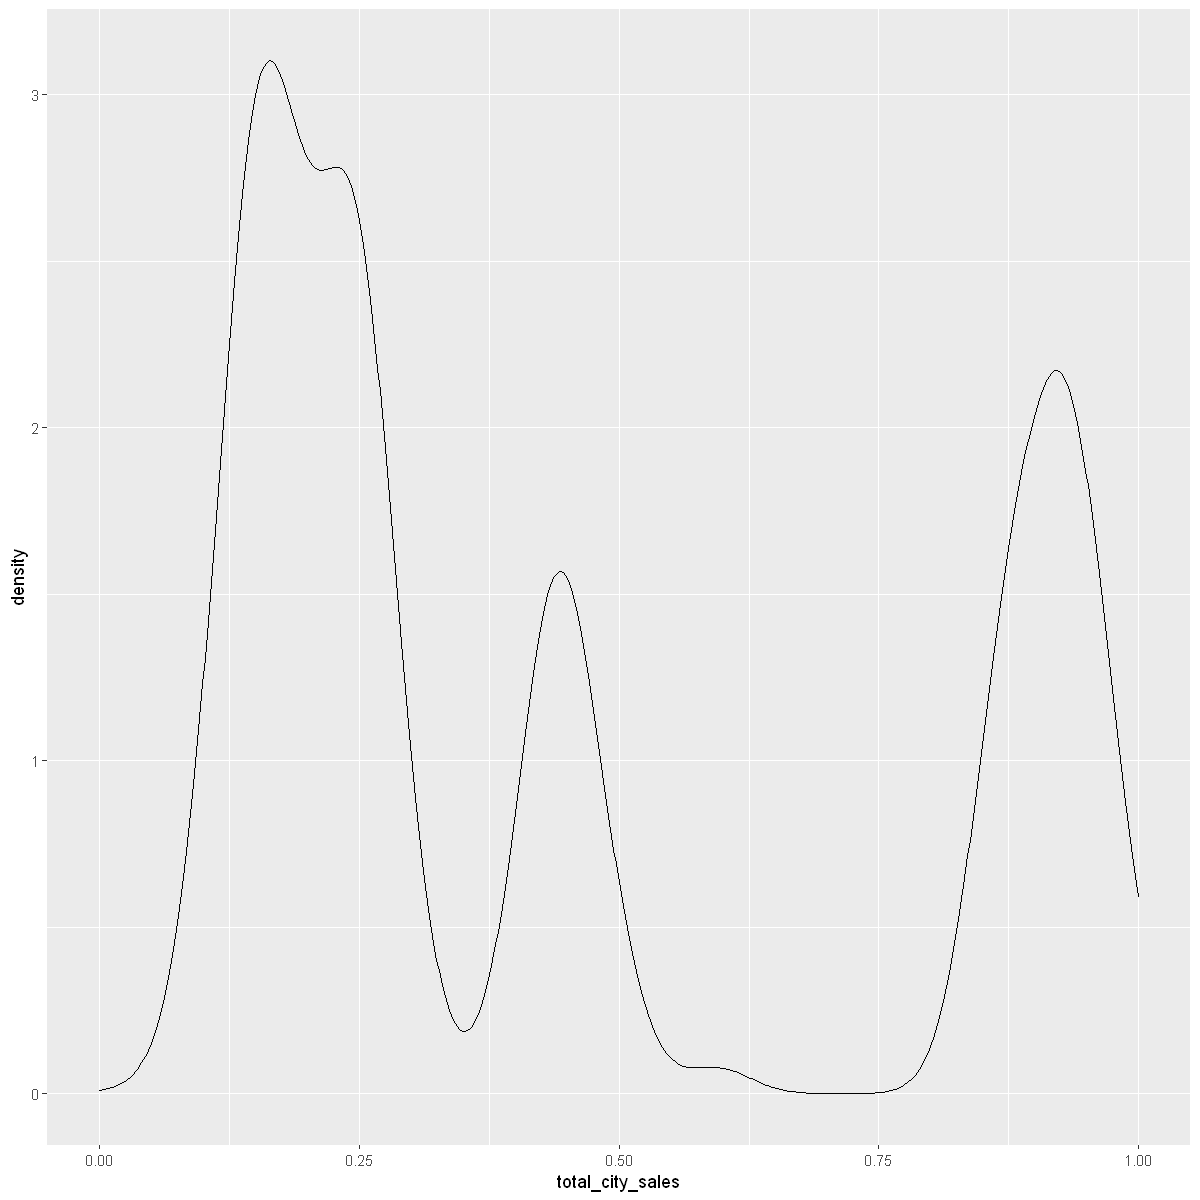

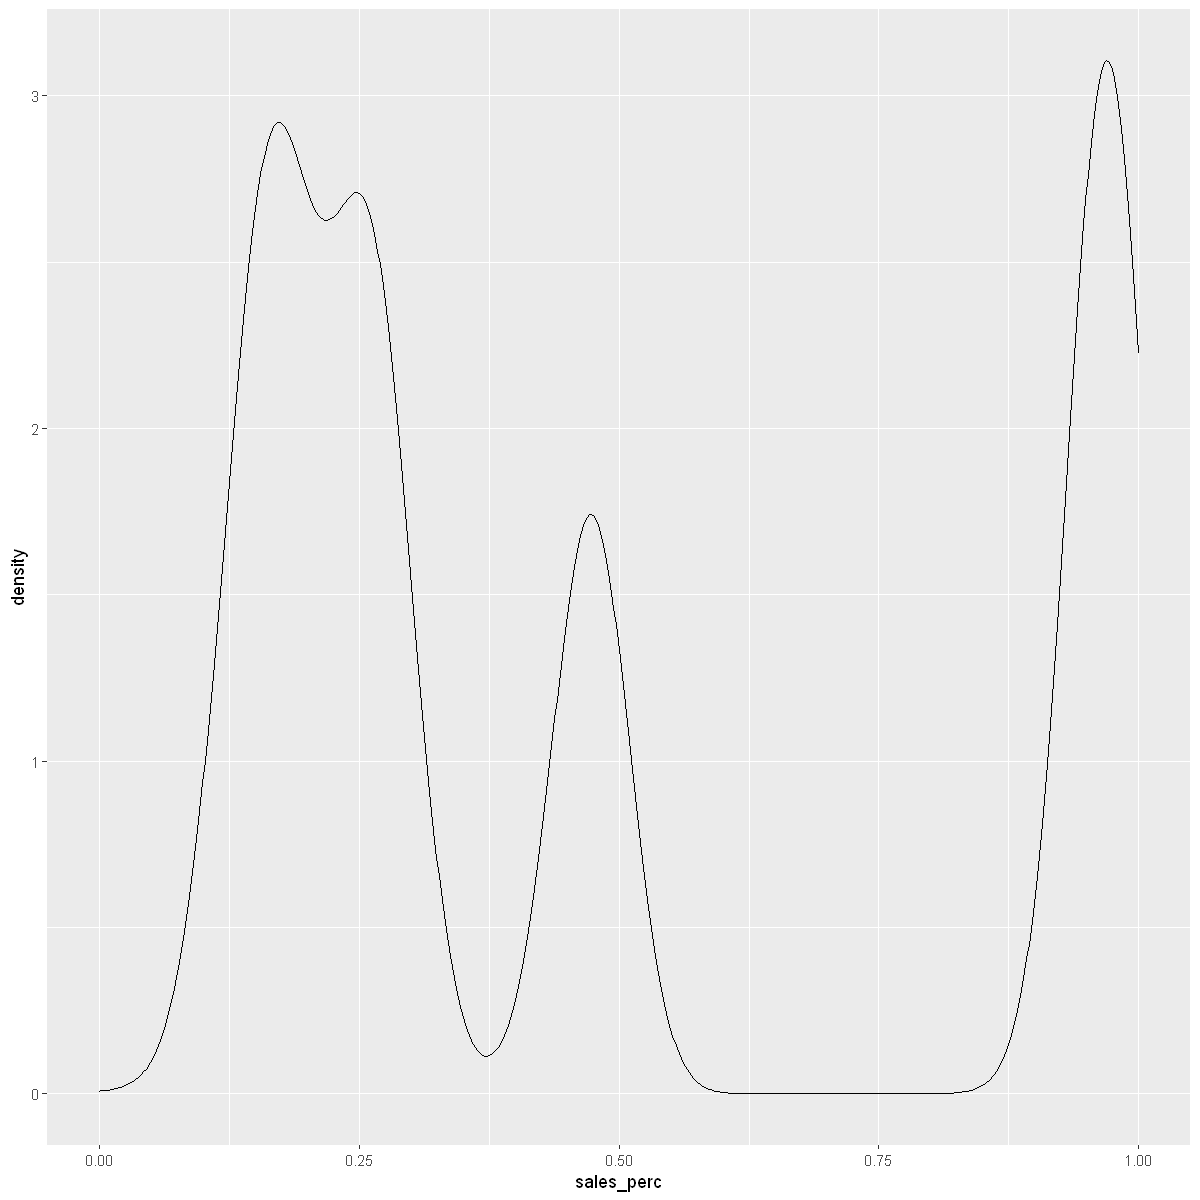

In [17]:
for (v in nf){
    print(ggplot(df,aes(x=sqrt(df[[v]]))) +
    geom_density(adjust=2)+ xlab(v))
}

In [30]:
##df$item_nbr <- as.character(df$item_nbr)
##df$Year <- as.character(df$Year)
##df$store_nbr <- as.character(df$store_nbr)

In [42]:
items <- df %>% group_by(item_nbr) %>% summarize(item_per=n()/1734047)

In [43]:
stores <- df %>% group_by(store_nbr) %>% summarize(store_per=n()/1734047)

In [44]:
Years <- df %>% group_by(Year) %>% summarize(Year_per=n()/1734047)

In [45]:
Years

Year,Year_per
<int>,<dbl>
2013,0.1432130
2014,0.1970569
2015,0.2381158
2016,0.2564809
2017,0.1672550


In [46]:
stores

store_nbr,store_per
<int>,<dbl>
1,0.0225847396
2,0.0232150570
3,0.0160255172
4,0.0229555485
5,0.0230109103
6,0.0232456214
7,0.0227266043
8,0.0233621119
9,0.0229688123


In [47]:
dfsales <- df %>% select(id,total_unit_sales)

In [48]:
df<- df[,!names(df) %in% c('year2016')]

In [49]:
head(df)

,item_nbr,store_nbr,Year,month,store_cluster,prev_month_sales,prev_3month_sales,avg_prev_3months_sales,min_prev_3months_sales,max_prev_3months_sales,...,item621300,item414353,top5_item,class1040,class1122,class3020,class1072,class1016,top5_month,total_unit_sales
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1003679,1,2013,4,13,0.3351330,0.3573296,0.3702218,0.3747752,0.4005978,...,0,0,0,0,0,0,0,0,1,3.806662
2,1003679,1,2013,5,13,0.3275585,0.4404394,0.3224455,0.3747752,0.2881880,...,0,0,0,0,0,0,0,0,1,3.806662
3,1003679,1,2013,6,13,0.3275585,0.3331357,0.3237449,0.3747752,0.2920314,...,0,0,0,0,0,0,0,0,1,3.871201
4,1003679,1,2013,7,13,0.3388002,0.3255579,0.3031859,0.3072443,0.2920314,...,0,0,0,0,0,0,0,0,1,3.401197
5,1003679,1,2013,8,13,0.2569325,0.3255579,0.2942507,0.3072443,0.2920314,...,0,0,0,0,0,0,0,0,1,3.663562
6,1003679,1,2013,9,13,0.3026324,0.3368045,0.2972790,0.3072443,0.2994836,...,0,0,0,0,0,0,0,0,0,3.912023


In [50]:
df$year2013 <- ifelse(df$Year==2013,1,0)
df$year2014 <- ifelse(df$Year==2014,1,0)
df$year2015 <- ifelse(df$Year==2015,1,0)
df$year2016 <- ifelse(df$Year==2016,1,0)
df$year2017 <- ifelse(df$Year==2017,1,0)

In [51]:
df$month1 <- ifelse(df$month==1,1,0)
df$month2 <- ifelse(df$month==2,1,0)
df$month3 <- ifelse(df$month==3,1,0)
df$month4 <- ifelse(df$month==4,1,0)
df$month5 <- ifelse(df$month==5,1,0)
df$month6 <- ifelse(df$month==6,1,0)
df$month7 <- ifelse(df$month==7,1,0)
df$month8 <- ifelse(df$month==8,1,0)
df$month9 <- ifelse(df$month==9,1,0)
df$month10 <- ifelse(df$month==10,1,0)
df$month11 <- ifelse(df$month==11,1,0)
df$month12 <- ifelse(df$month==12,1,0)

In [52]:
df1 <- df[, !names(df) %in% c('total_unit_sales')]

In [53]:
df2 <- left_join(df1,items,by='item_nbr')

In [54]:
df2 <- left_join(df2,stores,by='store_nbr')

In [55]:
df2 <- left_join(df2,Years,by='Year')

In [56]:
df2 <- left_join(df2,dfsales,by='id')

In [57]:
head(df2)

,item_nbr,store_nbr,Year,month,store_cluster,prev_month_sales,prev_3month_sales,avg_prev_3months_sales,min_prev_3months_sales,max_prev_3months_sales,...,month7,month8,month9,month10,month11,month12,item_per,store_per,Year_per,total_unit_sales
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1003679,1,2013,4,13,0.3351330,0.3573296,0.3702218,0.3747752,0.4005978,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.806662
2,1003679,1,2013,5,13,0.3275585,0.4404394,0.3224455,0.3747752,0.2881880,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.806662
3,1003679,1,2013,6,13,0.3275585,0.3331357,0.3237449,0.3747752,0.2920314,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.871201
4,1003679,1,2013,7,13,0.3388002,0.3255579,0.3031859,0.3072443,0.2920314,...,1,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.401197
5,1003679,1,2013,8,13,0.2569325,0.3255579,0.2942507,0.3072443,0.2920314,...,0,1,0,0,0,0,0.001345984,0.02258474,0.143213,3.663562
6,1003679,1,2013,9,13,0.3026324,0.3368045,0.2972790,0.3072443,0.2994836,...,0,0,1,0,0,0,0.001345984,0.02258474,0.143213,3.912023


In [58]:
names(df2)

[1] "item_nbr"                      "store_nbr"                    
  [3] "Year"                          "month"                        
  [5] "store_cluster"                 "prev_month_sales"             
  [7] "prev_3month_sales"             "avg_prev_3months_sales"       
  [9] "min_prev_3months_sales"        "max_prev_3months_sales"       
 [11] "monthly_oilprice_avg"          "total_month_holidays"         
 [13] "total_month_transactions"      "prev_month_transactions"      
 [15] "prev_3month_transactions"      "avg_prev_3months_transactions"
 [17] "min_prev_3months_transactions" "max_prev_3months_transactions"
 [19] "perishable"                    "BREAD.BAKERY"                 
 [21] "BEVERAGES"                     "DAIRY"                        
 [23] "PERSONAL.CARE"                 "HOME.CARE"                    
 [25] "FROZEN.FOODS"                  "POULTRY"                      
 [27] "GROCERY.II"                    "X.LIQUOR"                     
 [29] "EGGS"                          "GROCERY.I"                    
 [31] "CLEANING"                      "DELI"                         
 [33] "store_typeA"                   "store_typeB"                  
 [35] "store_typeC"                   "store_typeD"                  
 [37] "store_typeE"                   "city_Ambato"                  
 [39] "city_Babahoyo"                 "city_Cayambe"                 
 [41] "city_Cuenca"                   "city_Daule"                   
 [43] "city_El.Carmen"                "city_Esmeraldas"              
 [45] "city_Guaranda"                 "city_Guayaquil"               
 [47] "city_Ibarra"                   "city_Latacunga"               
 [49] "city_Libertad"                 "city_Loja"                    
 [51] "city_Machala"                  "city_Manta"                   
 [53] "city_Playas"                   "city_Puyo"                    
 [55] "city_Quevedo"                  "city_Quito"                   
 [57] "city_Riobamba"                 "city_Salinas"                 
 [59] "city_Santo.Domingo"            "total_city_sales.x"           
 [61] "sales_perc.x"                  "total_month_onpromotion"      
 [63] "cluster1"                      "cluster2"                     
 [65] "cluster3"                      "cluster4"                     
 [67] "cluster5"                      "cluster6"                     
 [69] "cluster7"                      "cluster8"                     
 [71] "cluster9"                      "cluster10"                    
 [73] "cluster11"                     "cluster12"                    
 [75] "cluster13"                     "cluster14"                    
 [77] "cluster15"                     "cluster16"                    
 [79] "cluster17"                     "id"                           
 [81] "item502331"                    "item273528"                   
 [83] "item564533"                    "item621300"                   
 [85] "item414353"                    "top5_item"                    
 [87] "class1040"                     "class1122"                    
 [89] "class3020"                     "class1072"                    
 [91] "class1016"                     "top5_month"                   
 [93] "year2013"                      "year2014"                     
 [95] "year2015"                      "year2016"                     
 [97] "year2017"                      "month1"                       
 [99] "month2"                        "month3"                       
[101] "month4"                        "month5"                       
[103] "month6"                        "month7"                       
[105] "month8"                        "month9"                       
[107] "month10"                       "month11"                      
[109] "month12"                       "item_per"                     
[111] "store_per"                     "Year_per"                     
[113] "total_unit_sales"

In [66]:
head(df2)

,item_nbr,store_nbr,Year,month,store_cluster,prev_month_sales,prev_3month_sales,avg_prev_3months_sales,min_prev_3months_sales,max_prev_3months_sales,...,month7,month8,month9,month10,month11,month12,item_per,store_per,Year_per,total_unit_sales
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1003679,1,2013,4,13,0.3351330,0.3573296,0.3702218,0.3747752,0.4005978,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.806662
2,1003679,1,2013,5,13,0.3275585,0.4404394,0.3224455,0.3747752,0.2881880,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.806662
3,1003679,1,2013,6,13,0.3275585,0.3331357,0.3237449,0.3747752,0.2920314,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.871201
4,1003679,1,2013,7,13,0.3388002,0.3255579,0.3031859,0.3072443,0.2920314,...,1,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.401197
5,1003679,1,2013,8,13,0.2569325,0.3255579,0.2942507,0.3072443,0.2920314,...,0,1,0,0,0,0,0.001345984,0.02258474,0.143213,3.663562
6,1003679,1,2013,9,13,0.3026324,0.3368045,0.2972790,0.3072443,0.2994836,...,0,0,1,0,0,0,0.001345984,0.02258474,0.143213,3.912023


In [64]:
df3 <- df2 %>% select(id,item_nbr,store_nbr,Year,month)

In [67]:
df2 <- left_join(df3,df2,by=c('id','item_nbr','store_nbr','Year','month'))

In [68]:
head(df2)

,id,item_nbr,store_nbr,Year,month,store_cluster,prev_month_sales,prev_3month_sales,avg_prev_3months_sales,min_prev_3months_sales,...,month7,month8,month9,month10,month11,month12,item_per,store_per,Year_per,total_unit_sales
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1003679,1,2013,4,13,0.3351330,0.3573296,0.3702218,0.3747752,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.806662
2,2,1003679,1,2013,5,13,0.3275585,0.4404394,0.3224455,0.3747752,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.806662
3,3,1003679,1,2013,6,13,0.3275585,0.3331357,0.3237449,0.3747752,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.871201
4,4,1003679,1,2013,7,13,0.3388002,0.3255579,0.3031859,0.3072443,...,1,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.401197
5,5,1003679,1,2013,8,13,0.2569325,0.3255579,0.2942507,0.3072443,...,0,1,0,0,0,0,0.001345984,0.02258474,0.143213,3.663562
6,6,1003679,1,2013,9,13,0.3026324,0.3368045,0.2972790,0.3072443,...,0,0,1,0,0,0,0.001345984,0.02258474,0.143213,3.912023


In [69]:
nf1<- c()
for (i in names(df2)){
    if (is.numeric(df2[,i])==TRUE){
        nf1<- c(nf1,i)
    }
}

In [70]:
nf1

[1] "id"                            "item_nbr"                     
  [3] "store_nbr"                     "Year"                         
  [5] "month"                         "store_cluster"                
  [7] "prev_month_sales"              "prev_3month_sales"            
  [9] "avg_prev_3months_sales"        "min_prev_3months_sales"       
 [11] "max_prev_3months_sales"        "monthly_oilprice_avg"         
 [13] "total_month_holidays"          "total_month_transactions"     
 [15] "prev_month_transactions"       "prev_3month_transactions"     
 [17] "avg_prev_3months_transactions" "min_prev_3months_transactions"
 [19] "max_prev_3months_transactions" "perishable"                   
 [21] "BREAD.BAKERY"                  "BEVERAGES"                    
 [23] "DAIRY"                         "PERSONAL.CARE"                
 [25] "HOME.CARE"                     "FROZEN.FOODS"                 
 [27] "POULTRY"                       "GROCERY.II"                   
 [29] "X.LIQUOR"                      "EGGS"                         
 [31] "GROCERY.I"                     "CLEANING"                     
 [33] "DELI"                          "store_typeA"                  
 [35] "store_typeB"                   "store_typeC"                  
 [37] "store_typeD"                   "store_typeE"                  
 [39] "city_Ambato"                   "city_Babahoyo"                
 [41] "city_Cayambe"                  "city_Cuenca"                  
 [43] "city_Daule"                    "city_El.Carmen"               
 [45] "city_Esmeraldas"               "city_Guaranda"                
 [47] "city_Guayaquil"                "city_Ibarra"                  
 [49] "city_Latacunga"                "city_Libertad"                
 [51] "city_Loja"                     "city_Machala"                 
 [53] "city_Manta"                    "city_Playas"                  
 [55] "city_Puyo"                     "city_Quevedo"                 
 [57] "city_Quito"                    "city_Riobamba"                
 [59] "city_Salinas"                  "city_Santo.Domingo"           
 [61] "total_city_sales.x"            "sales_perc.x"                 
 [63] "total_month_onpromotion"       "cluster1"                     
 [65] "cluster2"                      "cluster3"                     
 [67] "cluster4"                      "cluster5"                     
 [69] "cluster6"                      "cluster7"                     
 [71] "cluster8"                      "cluster9"                     
 [73] "cluster10"                     "cluster11"                    
 [75] "cluster12"                     "cluster13"                    
 [77] "cluster14"                     "cluster15"                    
 [79] "cluster16"                     "cluster17"                    
 [81] "item502331"                    "item273528"                   
 [83] "item564533"                    "item621300"                   
 [85] "item414353"                    "top5_item"                    
 [87] "class1040"                     "class1122"                    
 [89] "class3020"                     "class1072"                    
 [91] "class1016"                     "top5_month"                   
 [93] "year2013"                      "year2014"                     
 [95] "year2015"                      "year2016"                     
 [97] "year2017"                      "month1"                       
 [99] "month2"                        "month3"                       
[101] "month4"                        "month5"                       
[103] "month6"                        "month7"                       
[105] "month8"                        "month9"                       
[107] "month10"                       "month11"                      
[109] "month12"                       "item_per"                     
[111] "store_per"                     "Year_per"                     
[113] "total_unit_sales"

In [71]:
length(nf1)

[1] 113

In [72]:
nf1 <- nf1[c(1,7:111)]

In [73]:
nf1

[1] "id"                            "prev_month_sales"             
  [3] "prev_3month_sales"             "avg_prev_3months_sales"       
  [5] "min_prev_3months_sales"        "max_prev_3months_sales"       
  [7] "monthly_oilprice_avg"          "total_month_holidays"         
  [9] "total_month_transactions"      "prev_month_transactions"      
 [11] "prev_3month_transactions"      "avg_prev_3months_transactions"
 [13] "min_prev_3months_transactions" "max_prev_3months_transactions"
 [15] "perishable"                    "BREAD.BAKERY"                 
 [17] "BEVERAGES"                     "DAIRY"                        
 [19] "PERSONAL.CARE"                 "HOME.CARE"                    
 [21] "FROZEN.FOODS"                  "POULTRY"                      
 [23] "GROCERY.II"                    "X.LIQUOR"                     
 [25] "EGGS"                          "GROCERY.I"                    
 [27] "CLEANING"                      "DELI"                         
 [29] "store_typeA"                   "store_typeB"                  
 [31] "store_typeC"                   "store_typeD"                  
 [33] "store_typeE"                   "city_Ambato"                  
 [35] "city_Babahoyo"                 "city_Cayambe"                 
 [37] "city_Cuenca"                   "city_Daule"                   
 [39] "city_El.Carmen"                "city_Esmeraldas"              
 [41] "city_Guaranda"                 "city_Guayaquil"               
 [43] "city_Ibarra"                   "city_Latacunga"               
 [45] "city_Libertad"                 "city_Loja"                    
 [47] "city_Machala"                  "city_Manta"                   
 [49] "city_Playas"                   "city_Puyo"                    
 [51] "city_Quevedo"                  "city_Quito"                   
 [53] "city_Riobamba"                 "city_Salinas"                 
 [55] "city_Santo.Domingo"            "total_city_sales.x"           
 [57] "sales_perc.x"                  "total_month_onpromotion"      
 [59] "cluster1"                      "cluster2"                     
 [61] "cluster3"                      "cluster4"                     
 [63] "cluster5"                      "cluster6"                     
 [65] "cluster7"                      "cluster8"                     
 [67] "cluster9"                      "cluster10"                    
 [69] "cluster11"                     "cluster12"                    
 [71] "cluster13"                     "cluster14"                    
 [73] "cluster15"                     "cluster16"                    
 [75] "cluster17"                     "item502331"                   
 [77] "item273528"                    "item564533"                   
 [79] "item621300"                    "item414353"                   
 [81] "top5_item"                     "class1040"                    
 [83] "class1122"                     "class3020"                    
 [85] "class1072"                     "class1016"                    
 [87] "top5_month"                    "year2013"                     
 [89] "year2014"                      "year2015"                     
 [91] "year2016"                      "year2017"                     
 [93] "month1"                        "month2"                       
 [95] "month3"                        "month4"                       
 [97] "month5"                        "month6"                       
 [99] "month7"                        "month8"                       
[101] "month9"                        "month10"                      
[103] "month11"                       "month12"                      
[105] "item_per"                      "store_per"

In [74]:
head(df2)

,id,item_nbr,store_nbr,Year,month,store_cluster,prev_month_sales,prev_3month_sales,avg_prev_3months_sales,min_prev_3months_sales,...,month7,month8,month9,month10,month11,month12,item_per,store_per,Year_per,total_unit_sales
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1003679,1,2013,4,13,0.3351330,0.3573296,0.3702218,0.3747752,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.806662
2,2,1003679,1,2013,5,13,0.3275585,0.4404394,0.3224455,0.3747752,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.806662
3,3,1003679,1,2013,6,13,0.3275585,0.3331357,0.3237449,0.3747752,...,0,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.871201
4,4,1003679,1,2013,7,13,0.3388002,0.3255579,0.3031859,0.3072443,...,1,0,0,0,0,0,0.001345984,0.02258474,0.143213,3.401197
5,5,1003679,1,2013,8,13,0.2569325,0.3255579,0.2942507,0.3072443,...,0,1,0,0,0,0,0.001345984,0.02258474,0.143213,3.663562
6,6,1003679,1,2013,9,13,0.3026324,0.3368045,0.2972790,0.3072443,...,0,0,1,0,0,0,0.001345984,0.02258474,0.143213,3.912023


In [75]:
write.csv(df2[,nf1],file="/Users/Guy/Documents/DataScience/data/minmaxeng.csv", row.names=FALSE)

In [85]:
df3 <- df2[,c(nf1,'total_unit_sales')]

In [86]:
df3 <- df3[,!names(df3) %in% c('prev_month_sales','prev_3month_sales','prev_3month_sales','avg_prev_3months_sales','min_prev_3months_sales','max_prev_3months_sales'
                              ,'total_month_transactions','prev_month_transactions','prev_3month_transactions','avg_prev_3months_transactions',
                               'min_prev_3months_transactions','max_prev_3months_transactions')]

In [87]:
names(df3)

[1] "id"                      "monthly_oilprice_avg"   
 [3] "total_month_holidays"    "perishable"             
 [5] "BREAD.BAKERY"            "BEVERAGES"              
 [7] "DAIRY"                   "PERSONAL.CARE"          
 [9] "HOME.CARE"               "FROZEN.FOODS"           
[11] "POULTRY"                 "GROCERY.II"             
[13] "X.LIQUOR"                "EGGS"                   
[15] "GROCERY.I"               "CLEANING"               
[17] "DELI"                    "store_typeA"            
[19] "store_typeB"             "store_typeC"            
[21] "store_typeD"             "store_typeE"            
[23] "city_Ambato"             "city_Babahoyo"          
[25] "city_Cayambe"            "city_Cuenca"            
[27] "city_Daule"              "city_El.Carmen"         
[29] "city_Esmeraldas"         "city_Guaranda"          
[31] "city_Guayaquil"          "city_Ibarra"            
[33] "city_Latacunga"          "city_Libertad"          
[35] "city_Loja"               "city_Machala"           
[37] "city_Manta"              "city_Playas"            
[39] "city_Puyo"               "city_Quevedo"           
[41] "city_Quito"              "city_Riobamba"          
[43] "city_Salinas"            "city_Santo.Domingo"     
[45] "total_city_sales.x"      "sales_perc.x"           
[47] "total_month_onpromotion" "cluster1"               
[49] "cluster2"                "cluster3"               
[51] "cluster4"                "cluster5"               
[53] "cluster6"                "cluster7"               
[55] "cluster8"                "cluster9"               
[57] "cluster10"               "cluster11"              
[59] "cluster12"               "cluster13"              
[61] "cluster14"               "cluster15"              
[63] "cluster16"               "cluster17"              
[65] "item502331"              "item273528"             
[67] "item564533"              "item621300"             
[69] "item414353"              "top5_item"              
[71] "class1040"               "class1122"              
[73] "class3020"               "class1072"              
[75] "class1016"               "top5_month"             
[77] "year2013"                "year2014"               
[79] "year2015"                "year2016"               
[81] "year2017"                "month1"                 
[83] "month2"                  "month3"                 
[85] "month4"                  "month5"                 
[87] "month6"                  "month7"                 
[89] "month8"                  "month9"                 
[91] "month10"                 "month11"                
[93] "month12"                 "item_per"               
[95] "store_per"               "total_unit_sales"

In [88]:
write.csv(df3,file="/Users/Guy/Documents/DataScience/data/minmaxeng2.csv", row.names=FALSE)